# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
import math

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from tqdm import tqdm

In [2]:
# Loading the train_dataset, train_salaries, test_dataset(pass your file path from drive)
train_data = pd.read_csv("train_dataset.csv")
train_data_salaries = pd.read_csv("train_salaries.csv")
test_data = pd.read_csv("test_dataset.csv")

In [3]:
# checking the train data
train_data.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [4]:
# checking the train data salaries
train_data_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [5]:
# checking the test data
test_data.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [6]:
# Adding salary data to train_dataset using merge on jobId
train_data = pd.merge(train_data,train_data_salaries,on="jobId")
train_data

jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[1000000 rows x 9 columns]

In [7]:
# Remove rows with salaries less than 30
train_data = train_data[train_data["salary"] >= 30]

# Print or examine the modified DataFrame
print(train_data)

                   jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary

**Note**:- Over here a salary of 30,000 dollars is not expected for a people having such high degrees as it may a data entry error.

# Basic EDA

## Identifying the number of features or columns

#### Knowing all the names of the columns¶

In [8]:
# getting all column names
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [9]:
# Checking which columns are having categorical, numerical or boolean values of train_dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998066 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                998066 non-null  object
 1   companyId            998066 non-null  object
 2   jobType              998066 non-null  object
 3   degree               998066 non-null  object
 4   major                998066 non-null  object
 5   industry             998066 non-null  object
 6   yearsExperience      998066 non-null  int64 
 7   milesFromMetropolis  998066 non-null  int64 
 8   salary               998066 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [10]:
# Checking which columns are having categorical, numerical or boolean values of test_dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

### Removing 'jobId' and 'companyId' data from train and test data

In [11]:
# dropping jobId and companyId from train_dataset
train_data = train_data.drop(["jobId","companyId"],axis=1)
train_data.head()

jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH               10   
1             CEO  HIGH_SCHOOL       NONE      WEB                3   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE                8   

   milesFromMetropolis  salary  
0                   83     130  
1                   73     101  
2                   38     137  
3                   17     142  
4                   16     163

In [12]:
# dropping jobId and companyId from test_dataset
test_data = test_data.drop(["jobId","companyId"],axis=1)
test_data.head()

jobType       degree    major industry  yearsExperience  \
0  MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1   JUNIOR         NONE     NONE     AUTO               20   
2      CTO      MASTERS  BIOLOGY   HEALTH               17   
3  MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4   JUNIOR     DOCTORAL  BIOLOGY      OIL               10   

   milesFromMetropolis  
0                   73  
1                   47  
2                    9  
3                   96  
4                   44

## Knowing more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [13]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train_data.describe()

yearsExperience  milesFromMetropolis         salary
count    998066.000000        998066.000000  998066.000000
mean         12.010695            49.472072     116.235682
std           7.206264            28.865449      38.553055
min           0.000000             0.000000      30.000000
25%           6.000000            24.000000      89.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     301.000000

In [14]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test_data.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

### Getting the total number of samples in the dataset using the len() function

In [15]:
# len of train and test dataset
print(len(train_data))
print(len(test_data))

998066
1000000


## Getting unique values

In [16]:
# getting how many unique values are in train_dataset
train_data.nunique()

jobType                  8
degree                   5
major                    9
industry                 7
yearsExperience         25
milesFromMetropolis    100
salary                 266
dtype: int64

In [17]:
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in jobType: ['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']
Unique values in degree: ['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']
Unique values in major: ['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING']
Unique values in industry: ['HEALTH' 'WEB' 'AUTO' 'FINANCE' 'EDUCATION' 'OIL' 'SERVICE']
Unique values in yearsExperience: [10  3  8  2 23  9  1 17 24  7 21 13 11 14 18 20 12 15 22  0 19  5  4 16
  6]
Unique values in milesFromMetropolis: [83 73 38 17 16 31 24 70 54 68 30 79 29 26 81  8 91 43 66 99 96 62 69 63
 40  6 23  9  2 32 78 14 58 35 93 82 87 76 22 44 72  4 25 36  5 71 65 53
 13 33 55 61 98 59 15 75 56 11 12 34 21 52 46 48 97 28 94 41 74 60 95 80
 89 10 50 49  3 88 47 51 18 92 42 39 67 84 86  0 19 20 57 37 64  1 27 77
 90 45 85  7]
Unique values in salary: [130 101 137 142 163 113 178  73  31 104 102 144  79 193  47 172 126 122
  95  32  68 105  76 202 131 158  82 159 132 165 100 1

In [18]:
# getting how many unique values are in test_dataset
test_data.nunique()

jobType                  8
degree                   5
major                    9
industry                 7
yearsExperience         25
milesFromMetropolis    100
dtype: int64

In [19]:
for column in test_data.columns:
    unique_values = test_data[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in jobType: ['MANAGER' 'JUNIOR' 'CTO' 'SENIOR' 'CEO' 'VICE_PRESIDENT' 'JANITOR' 'CFO']
Unique values in degree: ['HIGH_SCHOOL' 'NONE' 'MASTERS' 'DOCTORAL' 'BACHELORS']
Unique values in major: ['NONE' 'BIOLOGY' 'COMPSCI' 'PHYSICS' 'LITERATURE' 'MATH' 'CHEMISTRY'
 'ENGINEERING' 'BUSINESS']
Unique values in industry: ['HEALTH' 'AUTO' 'OIL' 'FINANCE' 'SERVICE' 'EDUCATION' 'WEB']
Unique values in yearsExperience: [22 20 17 14 10  6  9 23  5  0 13 19  7 16 18  2 12  8 11  1  4  3 24 15
 21]
Unique values in milesFromMetropolis: [73 47  9 96 44 23 32 78 97 60 48  1 64 75 76 87 31 52 72 70 90 45 21 33
 19 53 35 65 17 29 69 27 67  4  7 59 55 25 51 37 42 94  0 24 11 39 13 99
 20 85  3 34 10 71 12 84  6 58 14 63 36 80 93 81 30 43 95 82  8 41 46 79
 98 18 92 86 89 16 40 88 83 66 77 62  2 15 22 49 56 50 38 68 54 91 61 57
  5 74 28 26]


#### As its clearly seen that in both the datasets, i.e., train_data and test_data the columns of degree and major both include "NONE" as the common value. This will create an issue in further encoding these columns as they are categorical in datatype. So its better to rename it.

In [20]:
# Renaming the NONE values for train_data:
train_data['degree'] = train_data['degree'].replace('NONE', 'degree_NONE')
train_data['major'] = train_data['major'].replace('NONE', 'major_NONE')

In [21]:
# Renaming the NONE values for test_data:
test_data['degree'] = test_data['degree'].replace('NONE', 'degree_NONE')
test_data['major'] = test_data['major'].replace('NONE', 'major_NONE')

## Counting the total number of missing values¶

In [22]:
# Checking for missing values in all the columnns of the train_dataset
train_data.isnull().sum()

jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [23]:
 # Checking for missing values in all the columnns of the test_dataset
test_data.isnull().sum()

jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

### By the observation gather from the train_data.info() and test_data.info(), we can know there are no missing values in the train and test dataset

## Checking for categorical columns in the dataset

By observing the train_data.info() cell, we can bifurcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [24]:
# creating two empty list to store categorical column names and numerical column names respectively
catcol = []
numcol = []
# looping on whole dataset for geting list of categorical data column name
for i in train_data.columns:
    if train_data[i].dtype == "object":
        catcol.append(i)
    else:
        numcol.append(i)

In [25]:
print(catcol)

['jobType', 'degree', 'major', 'industry']


In [26]:
print(numcol)

['yearsExperience', 'milesFromMetropolis', 'salary']


## Correlation Matrix

#### A correlation matrix is a table showing correlation coefficients between variables.


### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

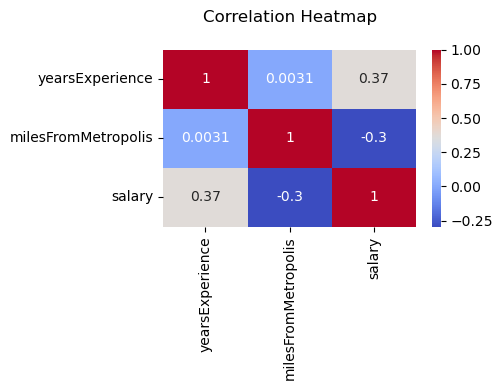

In [27]:
# Correlation matrix using pandas
corr = train_data.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(5,4))  
heatmap = sns.heatmap(data=corr, annot=True, cmap="coolwarm")

# Adding a title to the heatmap
heatmap.set_title("Correlation Heatmap", pad=20)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the heatmap
plt.tight_layout() 
plt.show()

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have negligible positive correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

## Chi-square Test

1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [28]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def perform_chi_square_test(catcol_1, catcol_2):
    
    # Contingency Table
    contingency_table = pd.crosstab(train_data[catcol_1], train_data[catcol_2])
    
    # Observed Values
    observed_values = contingency_table.values
    
    # Expected Values
    expected_values = chi2_contingency(contingency_table)[3]
    
    # Degree of Freedom
    no_of_rows = len(contingency_table)
    no_of_columns = len(contingency_table.columns)
    degree_f = (no_of_rows - 1) * (no_of_columns - 1)
    print("Degree of Freedom:", degree_f)
    
    # Significance Level 5%
    alpha = 0.05
    print('Significance level:', alpha)
    
    # chi-square statistic
    chi_square = sum([(o-e)**2/e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0] + chi_square[1]
    print("chi-square statistic:", chi_square_statistic)
    
    # critical_value
    critical_value = chi2.ppf(q=1 - alpha, df=degree_f)
    print('critical_value:', critical_value)
    
    # p-value
    p_value = 1 - chi2.cdf(x=chi_square_statistic, df=degree_f)
    print('p-value:', p_value)
          
    if chi_square_statistic >= critical_value:
        print("Reject H0, There is a relationship between 2 categorical variables")
    else:
        print("Retain H0, There is no relationship between 2 categorical variables")

    if p_value <= alpha:
        print("Reject H0, There is a relationship between 2 categorical variables")
    else:
        print("Retain H0, There is no relationship between 2 categorical variables")


In [29]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for i in catcol:
    for j in catcol:
        if j != i:
            print('chi-square test on: ',i,' ',j,'\n')
            perform_chi_square_test(i,j)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom: 28
Significance level: 0.05
chi-square statistic: 49355.646000906796
critical_value: 41.33713815142739
p-value: 0.0
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom: 56
Significance level: 0.05
chi-square statistic: 16449.165645787856
critical_value: 74.46832415930936
p-value: 0.0
Reject H0, There is a relationship between 2 categorical variables
Reject H0, There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom: 42
Significance level: 0.05
chi-square statistic: 76.08919483156295
critical_value: 58.12403768086803
p-value: 0.0009986466942027983
Reject H0, There is a relationship between 2 catego

### From above chi-square test:
- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major

## Scatter Plot

1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


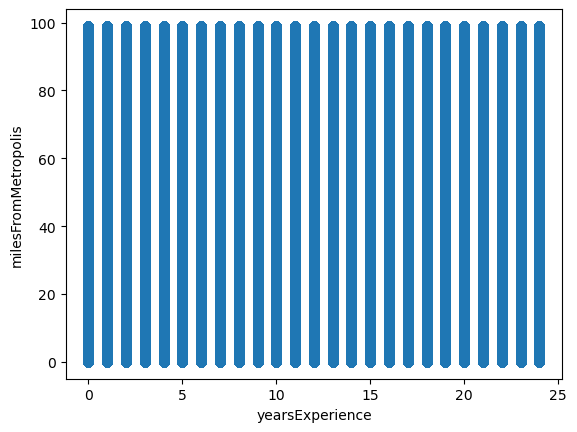

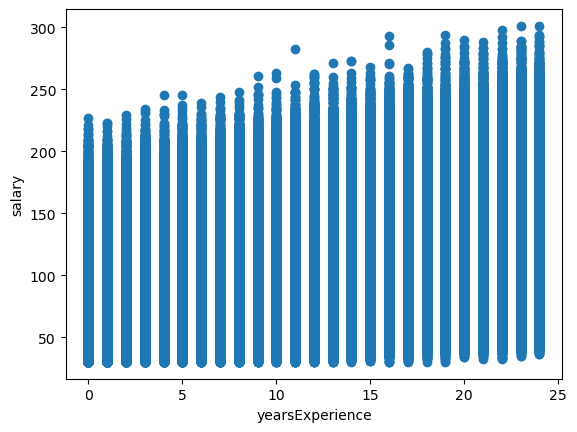

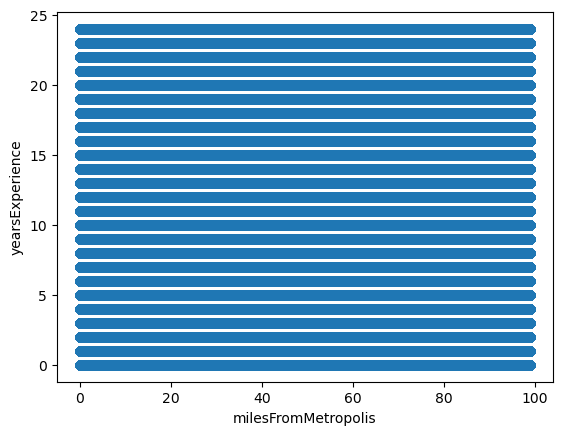

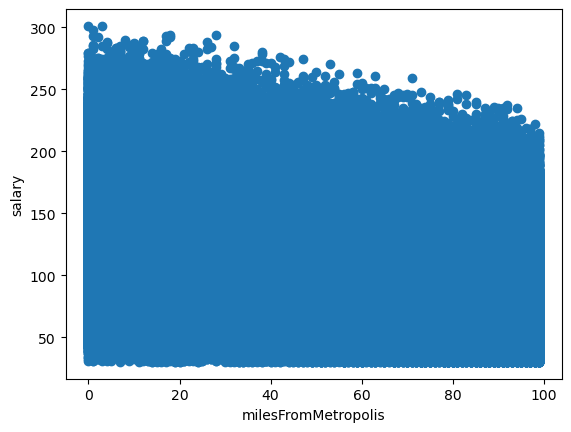

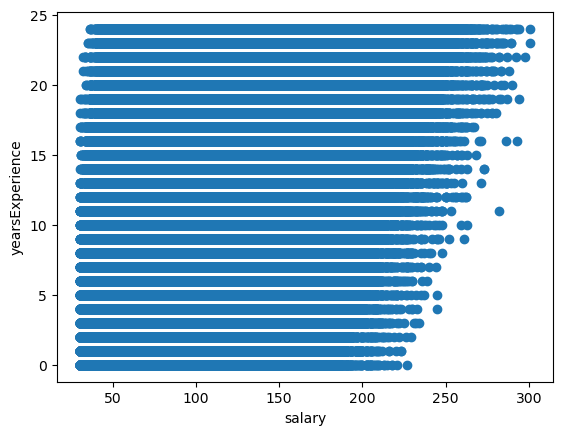

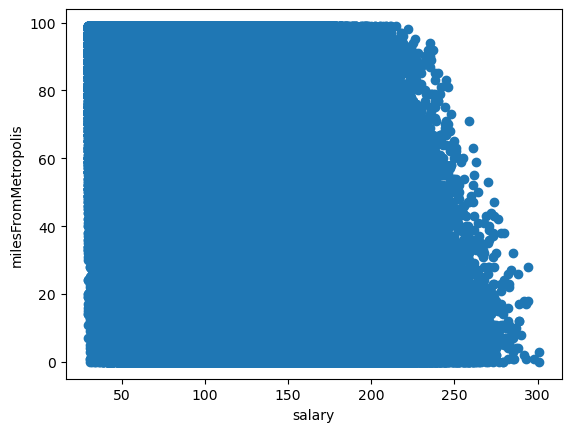

In [30]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x],train_data[y])
    plt.show()

# Loop through the different columns 
for i in numcol:
    for j in numcol:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

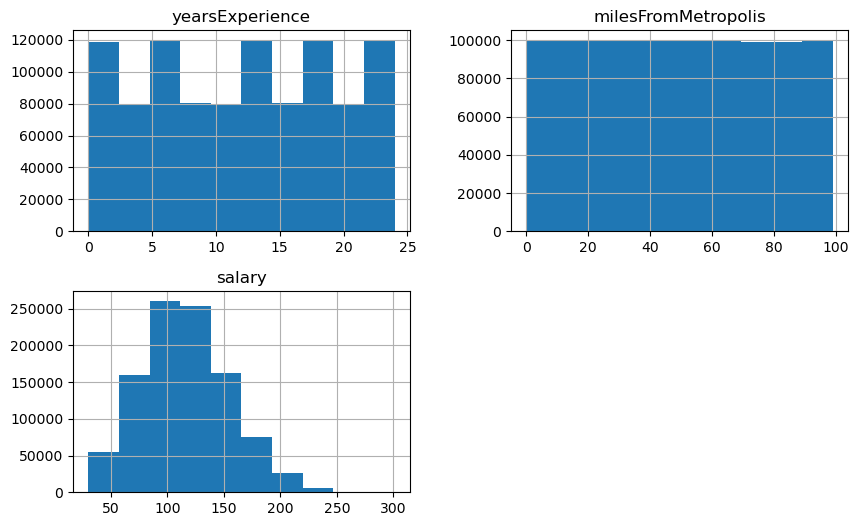

In [31]:
# Histogram using pandas 
train_data.hist(figsize=(10,6))
plt.show()

## From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)

## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

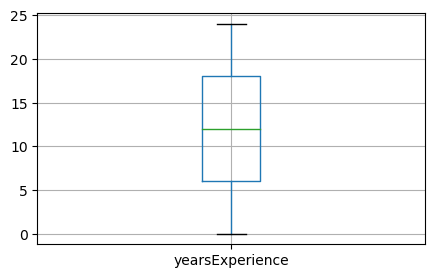

In [32]:
# box plot for yearsExperience column
train_data.boxplot(column="yearsExperience", figsize=(5,3))
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

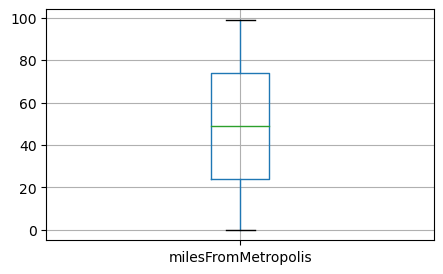

In [33]:
# box plot for milesFromMetropolies column
train_data.boxplot(column="milesFromMetropolis", figsize=(5,3))
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

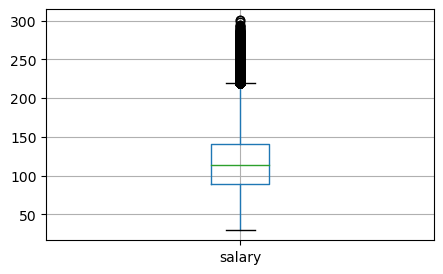

In [34]:
# box plot for salary column
train_data.boxplot(column="salary", figsize=(5,3))
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300

- The mean salary is around 120

## Violin Plot

1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

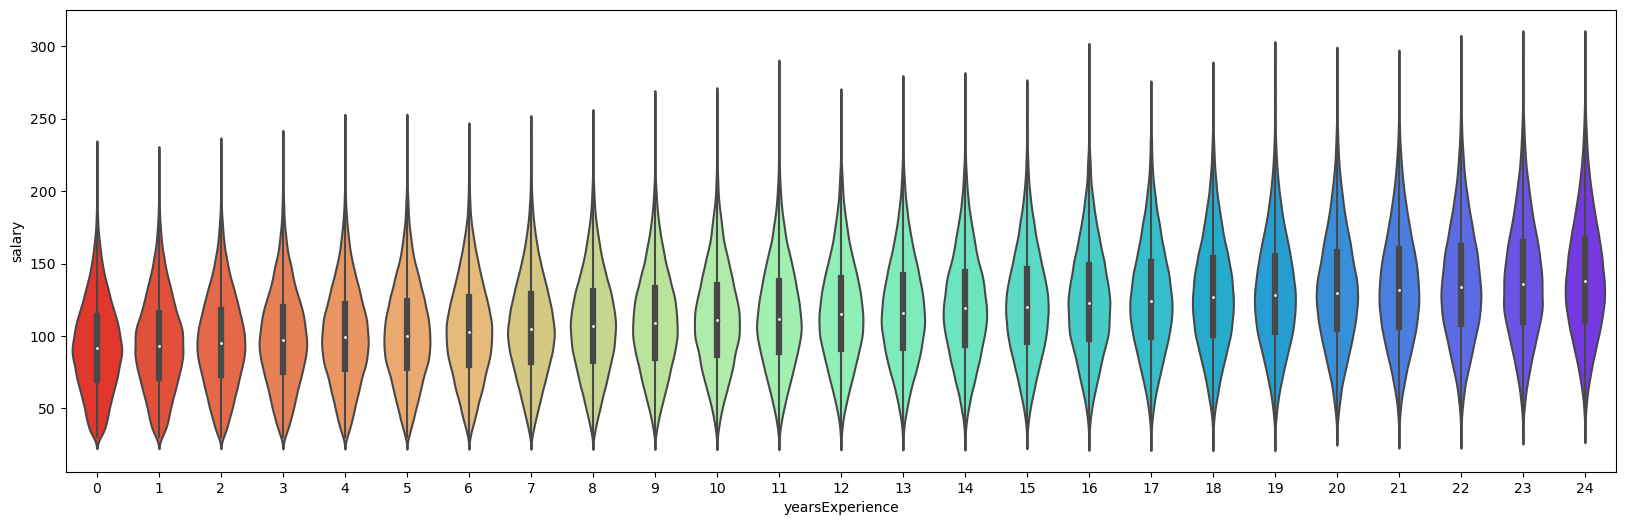

In [35]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x="yearsExperience",y="salary",data=train_data,palette="rainbow_r")
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

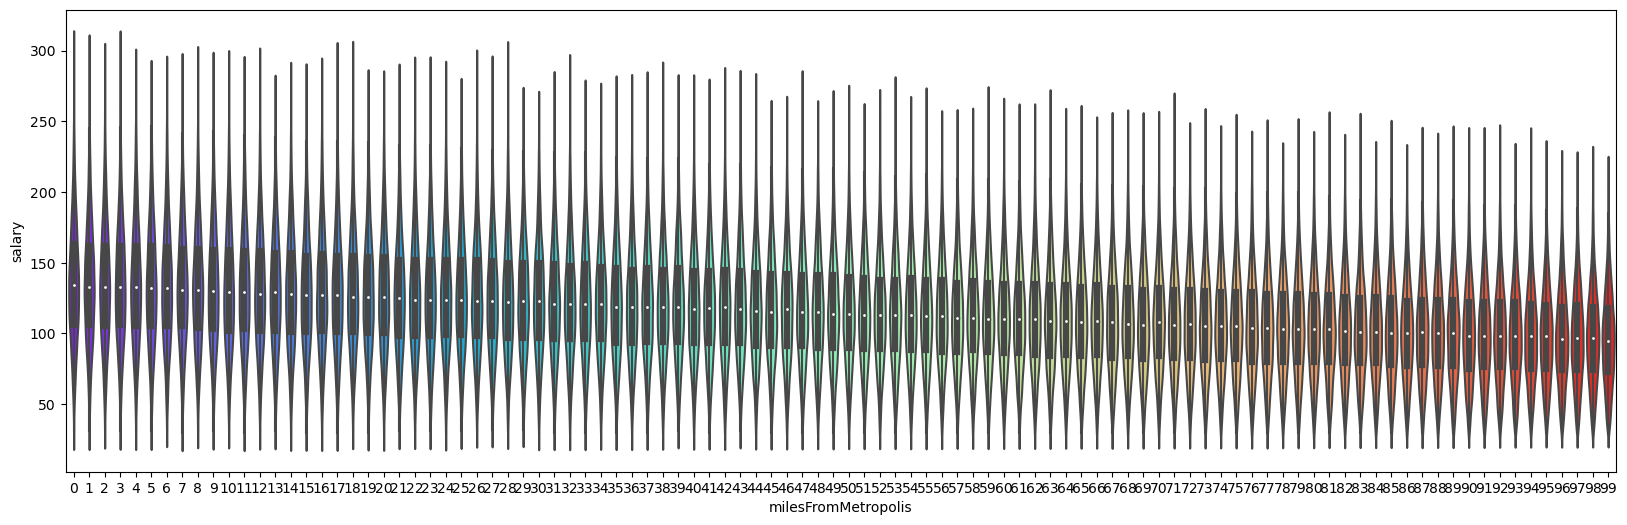

In [36]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x="milesFromMetropolis",y="salary",data=train_data,palette="rainbow")
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

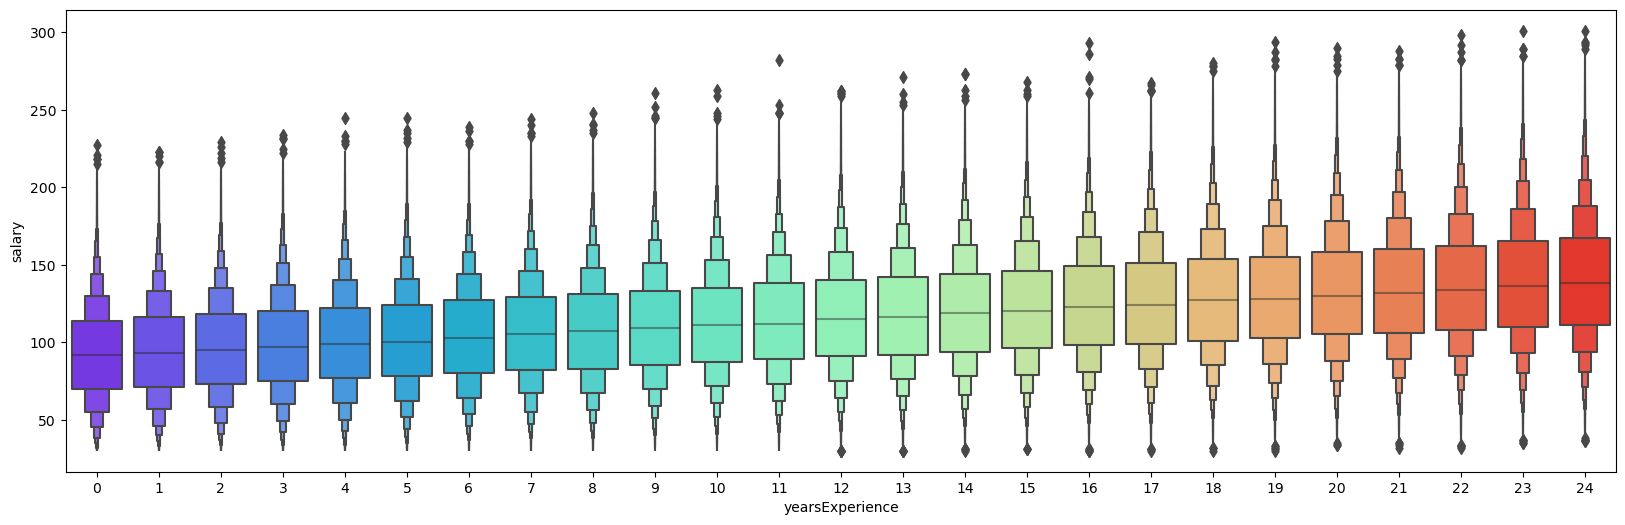

In [37]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x="yearsExperience",y="salary",data=train_data,palette="rainbow")
plt.show()

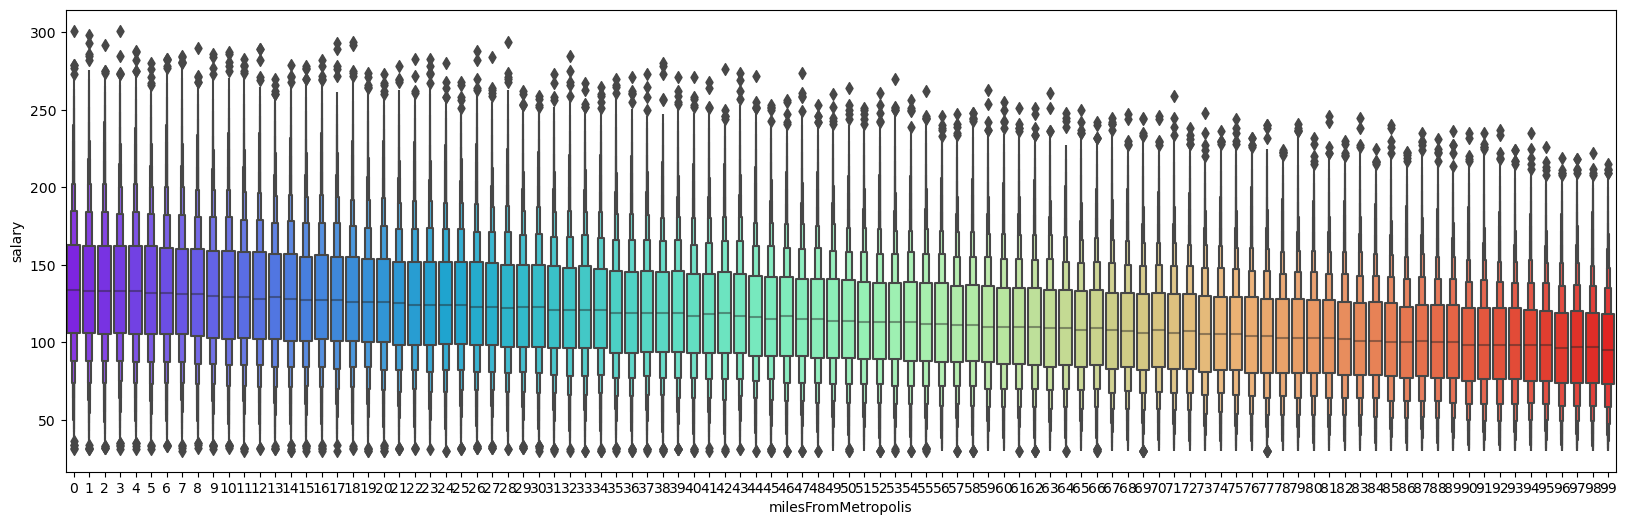

In [38]:
# boxen plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x="milesFromMetropolis",y="salary",data=train_data,palette="rainbow")
plt.show()

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.

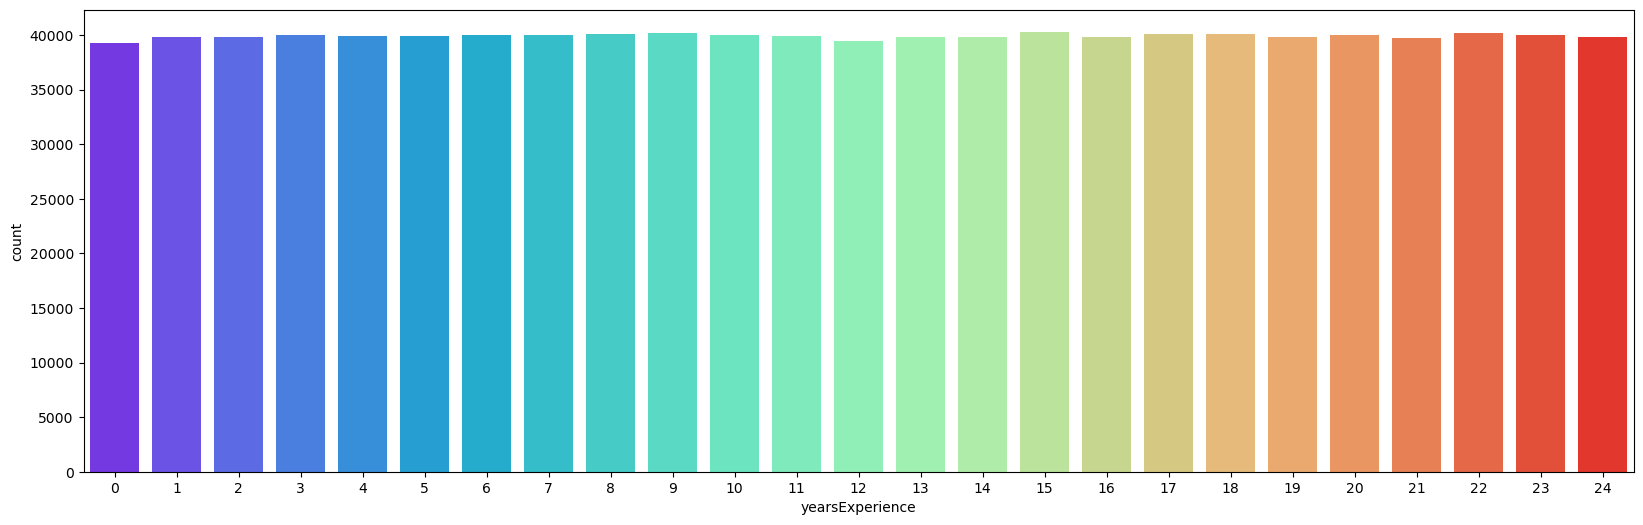

In [39]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x="yearsExperience",data=train_data,palette="rainbow")
plt.show()

From above count plot the distribution of values of yearExperience is equal over complete dataset, symmetrical.

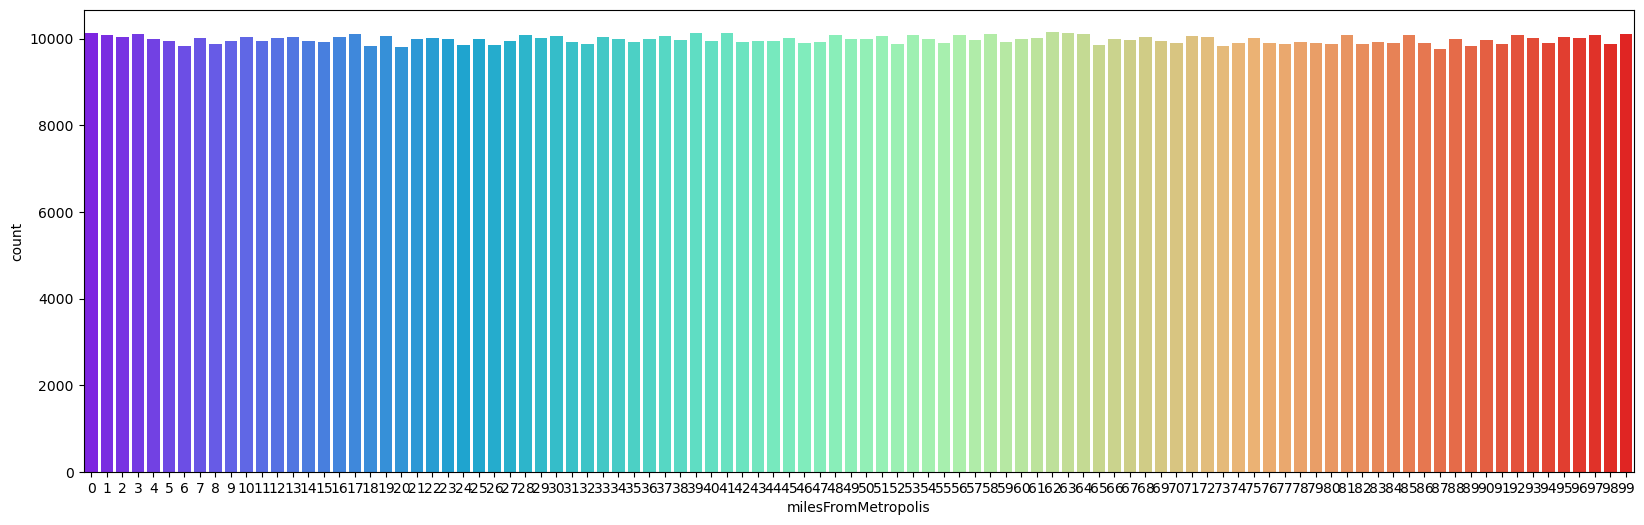

In [40]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(x="milesFromMetropolis",data=train_data,palette="rainbow")
plt.show()

From above count plot the distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Subset of train dataset
ploting process of swarm plot was taking huge time because of large dataset.

So, taking a subset of 50000 samples from train datset and plot it for interpretation. -->

## Swarm Plot

1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.

plot data on 50000 of 1000000 sample for clear visualization

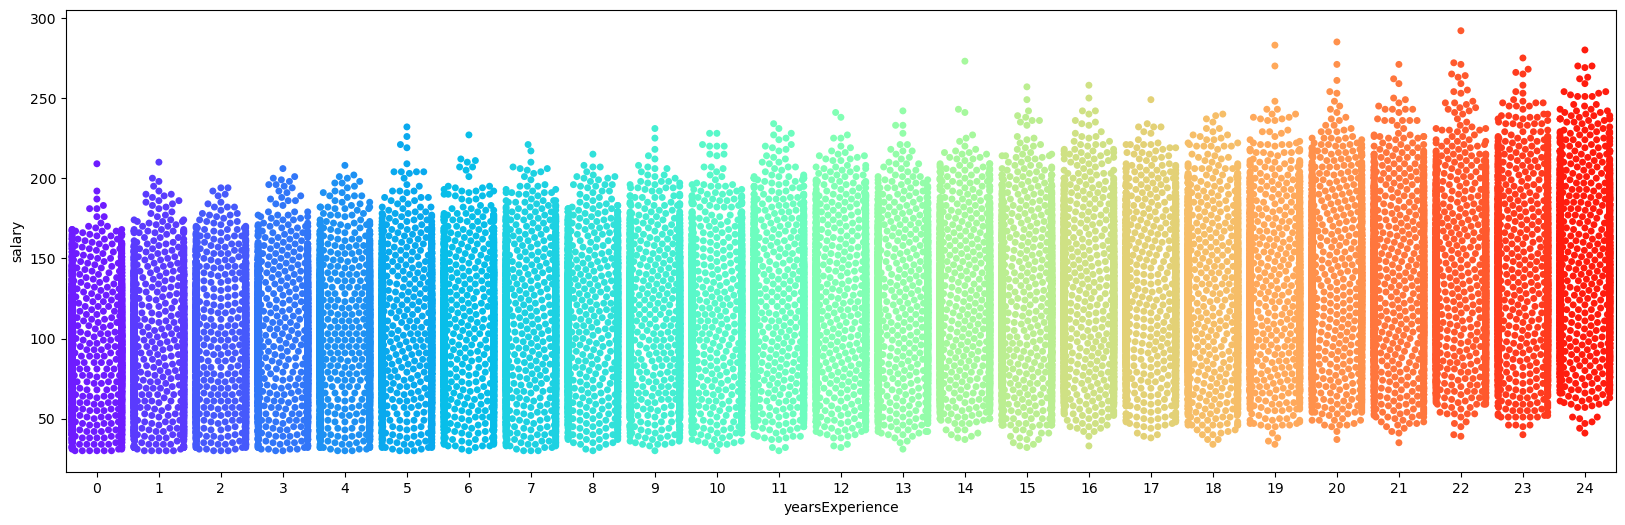

In [41]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x="yearsExperience",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

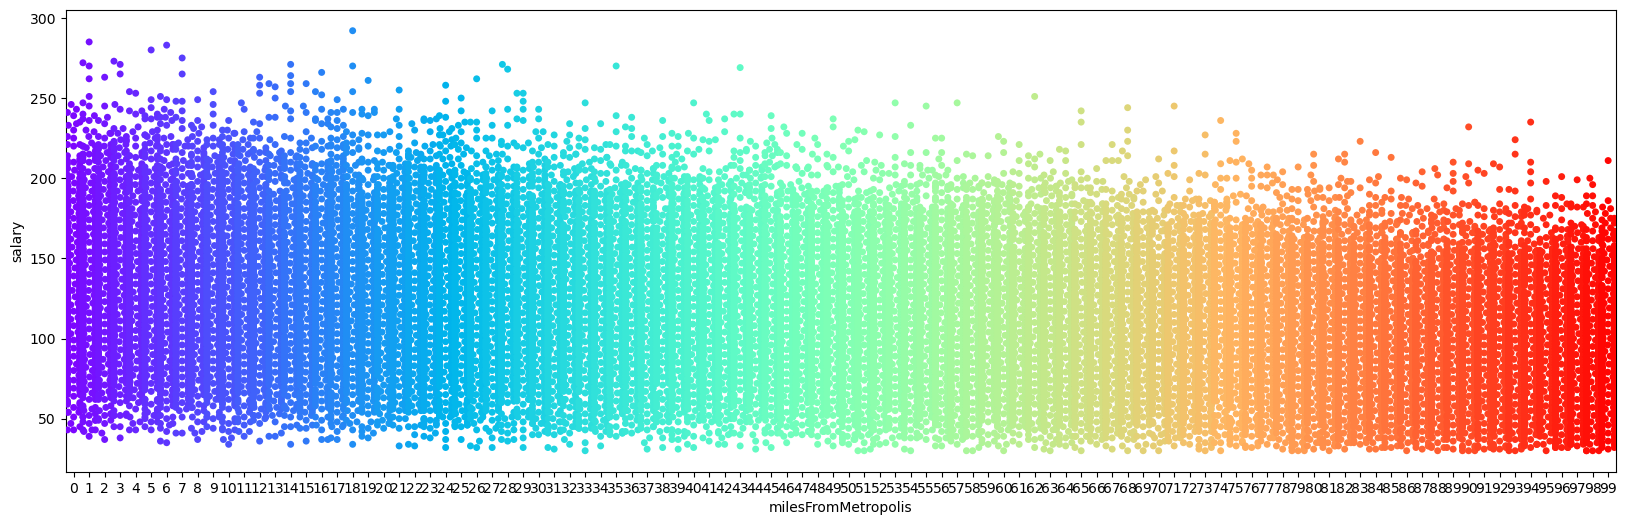

In [42]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x="milesFromMetropolis",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

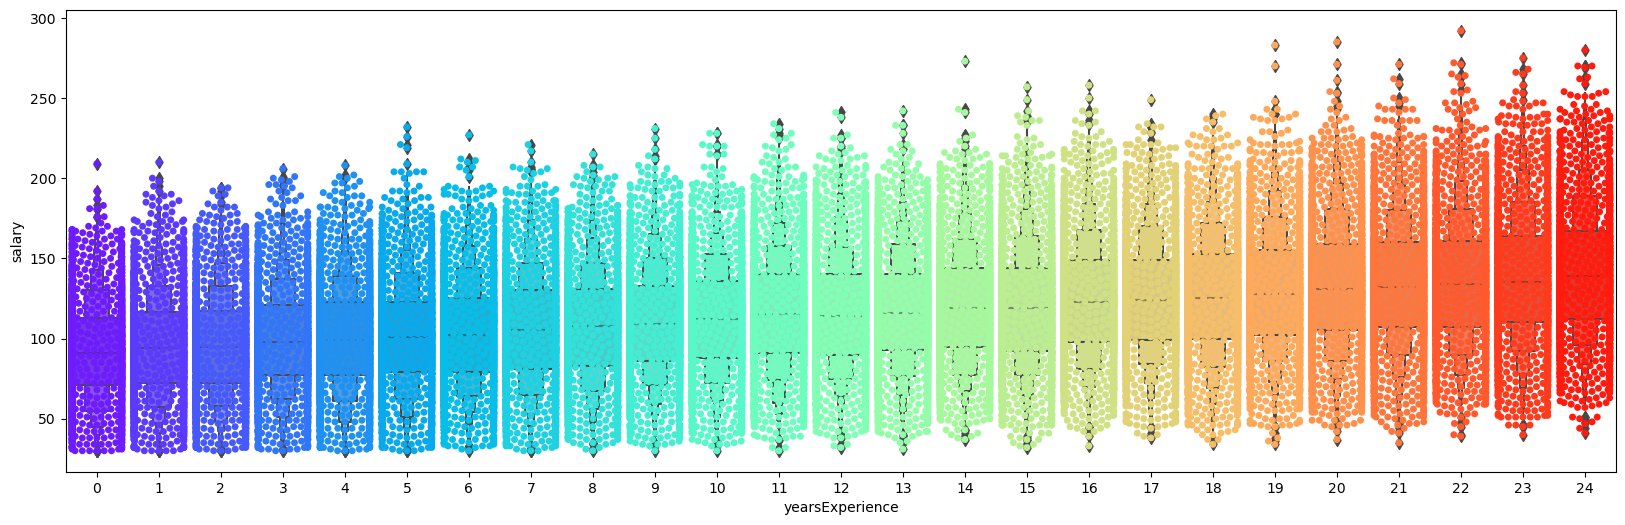

In [43]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x="yearsExperience",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
sns.swarmplot(x="yearsExperience",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is increasing as we move right on the axis of yearExperience

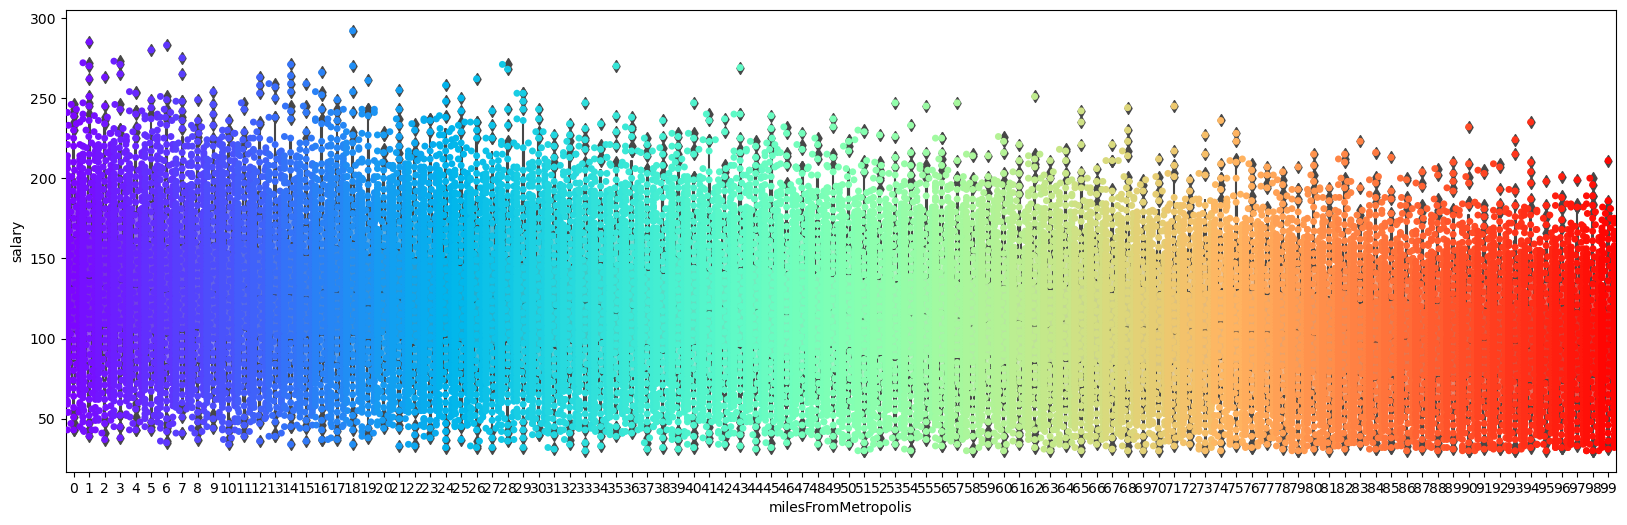

In [44]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(x="milesFromMetropolis",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
sns.swarmplot(x="milesFromMetropolis",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

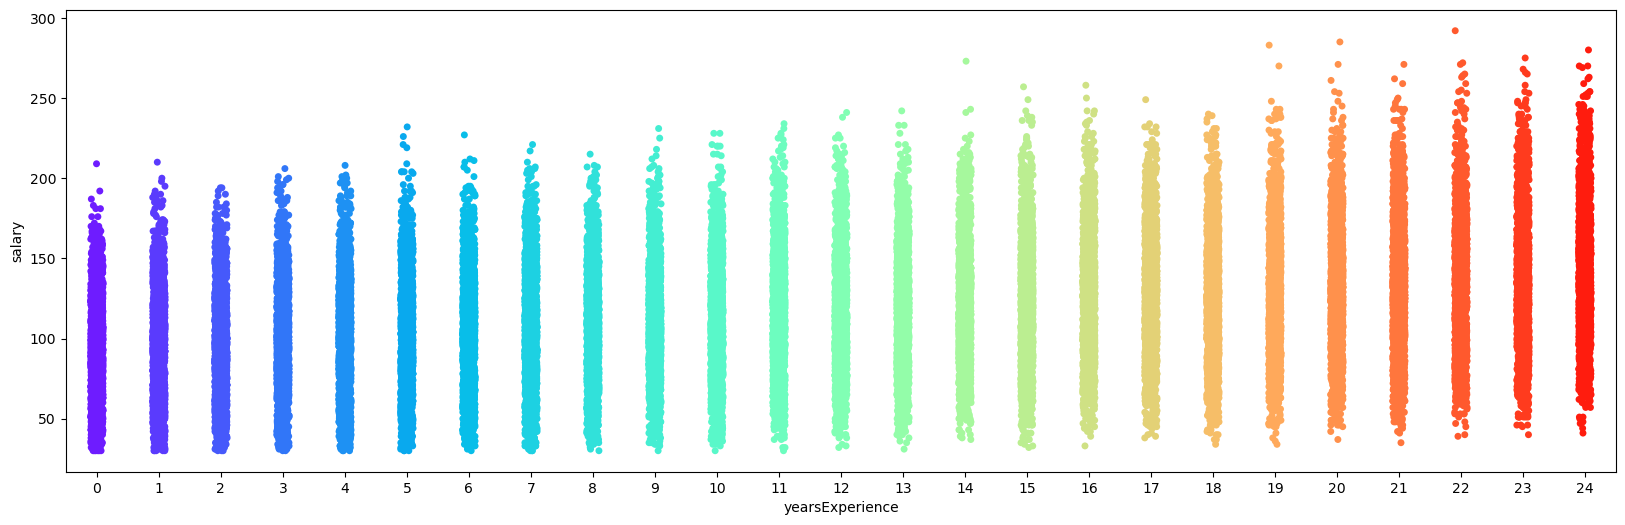

In [45]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x="yearsExperience",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
plt.show()

from above strip plot the Distribution of values of Salary increases for increase in values of yearsExperience

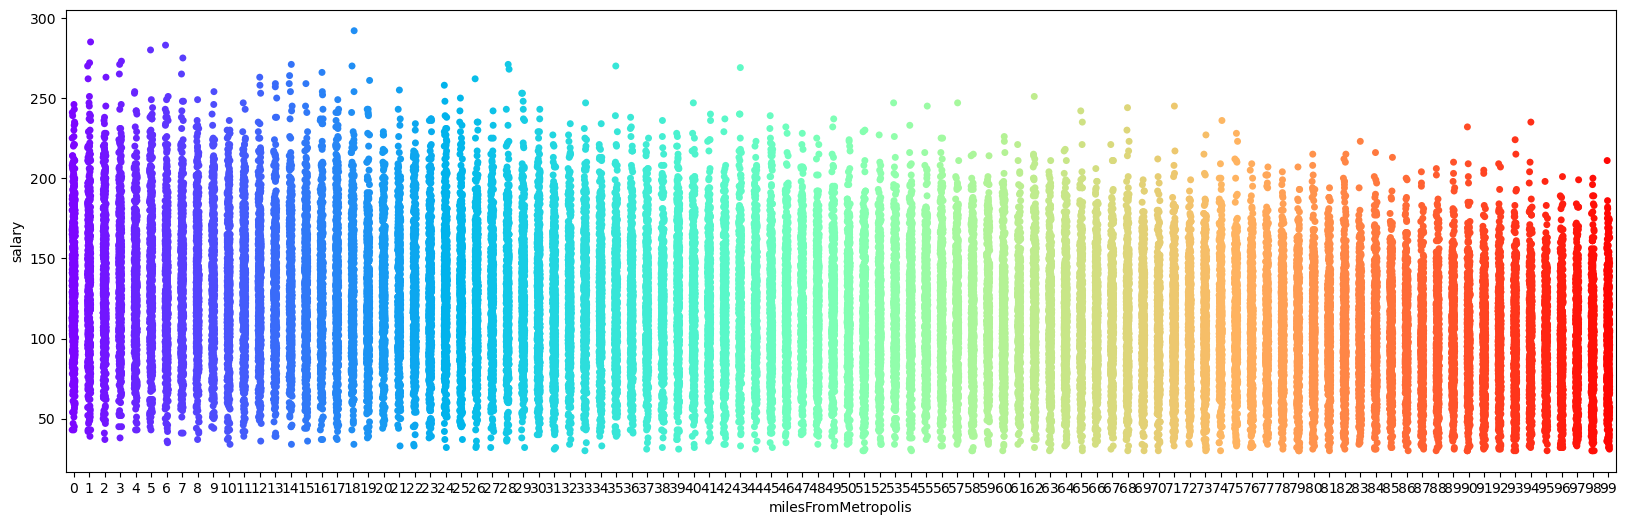

In [46]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x="milesFromMetropolis",y="salary",data=train_data.iloc[1:50000],palette="rainbow")
plt.show()

from above strip plot the Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

## According to five steps process of hypothesis testing:
1. H₀: μ₁= μ₂ = μ₃ = … = μ₆
2. H₁: Not all salary means are equal
3. α = 0.05
According to F test statistics:

In [47]:
def perform_anova_with_evaluation(data, category_column, numeric_column, alpha=0.05, critical_value=2.75):
    """
    Perform ANOVA test, generate probability plot, and evaluate the relationship between a categorical column and a numerical column.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        category_column (str): The name of the categorical column for grouping.
        numeric_column (str): The name of the numeric column for analysis.
        alpha (float): Significance level for hypothesis testing (default: 0.05).
        critical_value (float): Critical value for hypothesis testing (default: 2.75).

    Returns:
        (str, dict): Rejection decision and analysis results.
    """
    # Group data by category
    grouped_data = data.groupby(category_column)
    
    # Create probability plot
    plt.figure(figsize=(10, 6))
    for name, group in grouped_data:
        stats.probplot(group[numeric_column], plot=plt)
        plt.title(f"Probability Plot for {numeric_column} by {category_column} = {name}")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Ordered Values")
        plt.show()
    
    # Perform ANOVA test
    groups = [group[1][numeric_column].dropna() for group in grouped_data]
    anova_results = stats.f_oneway(*groups)
    
    p_value = anova_results.pvalue
    if p_value < alpha or anova_results.statistic > critical_value:
        rejection_decision = "Reject H0"
    else:
        rejection_decision = "Retain H0"
    
    result = {
        "Rejection Decision": rejection_decision,
        "Analysis Results": {
            "F-statistic": anova_results.statistic,
            "p-value": p_value,
            "Critical Value": critical_value
        }
    }
    return result

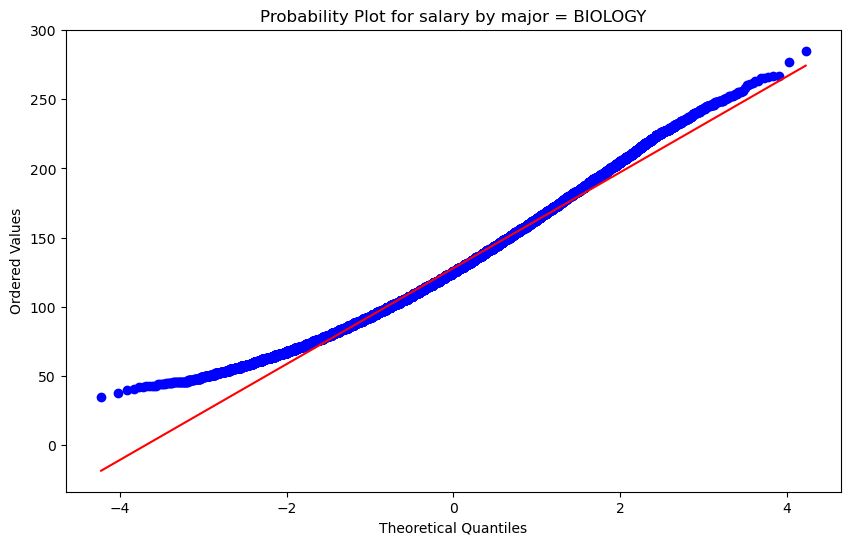

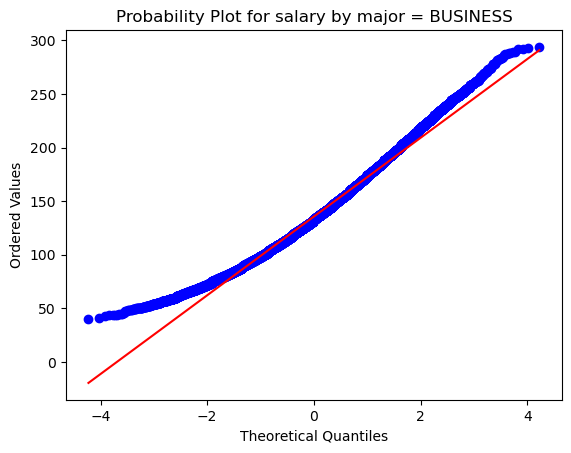

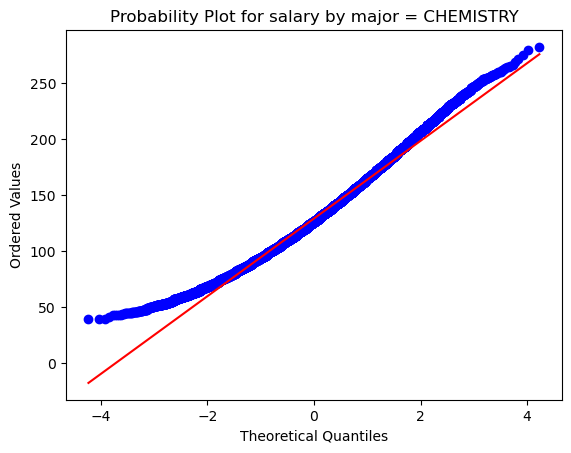

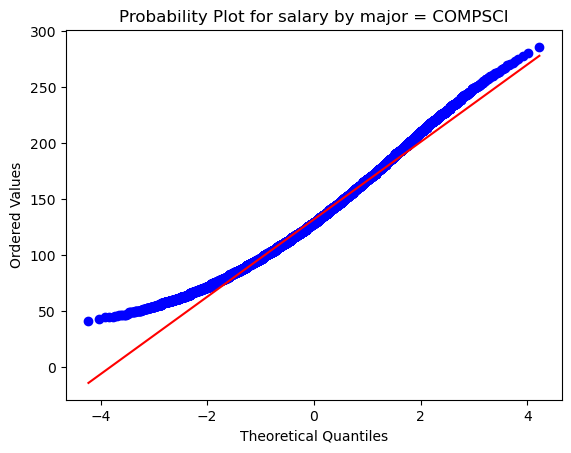

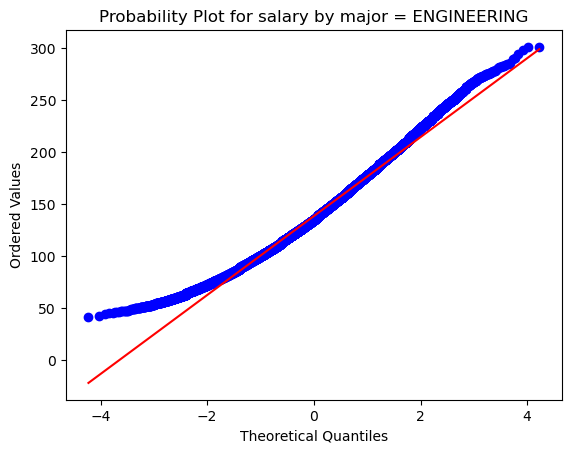

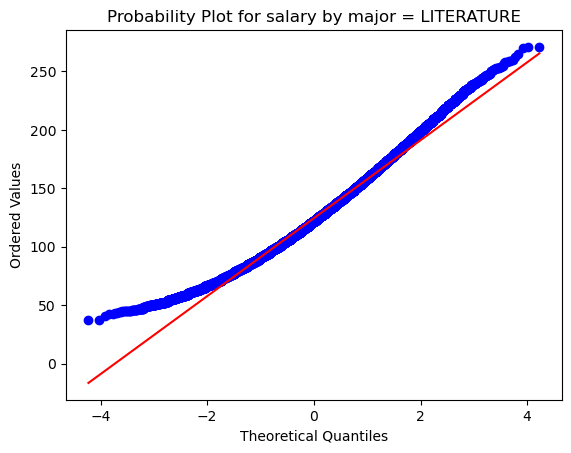

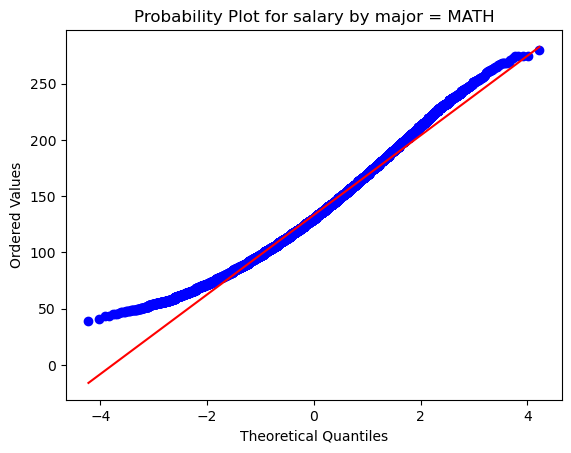

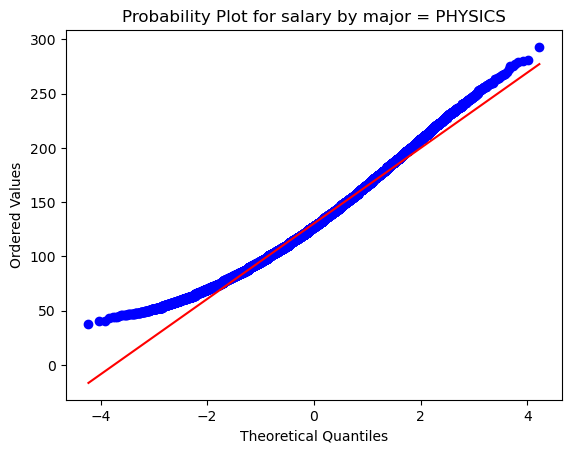

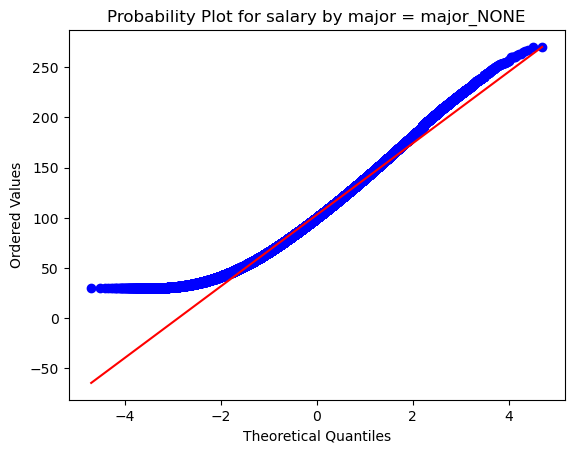

{'Rejection Decision': 'Reject H0', 'Analysis Results': {'F-statistic': 20647.136589821166, 'p-value': 0.0, 'Critical Value': 2.75}}


In [48]:
# performing anova test on major and salary
result = perform_anova_with_evaluation(train_data,"major","salary")
print(result)

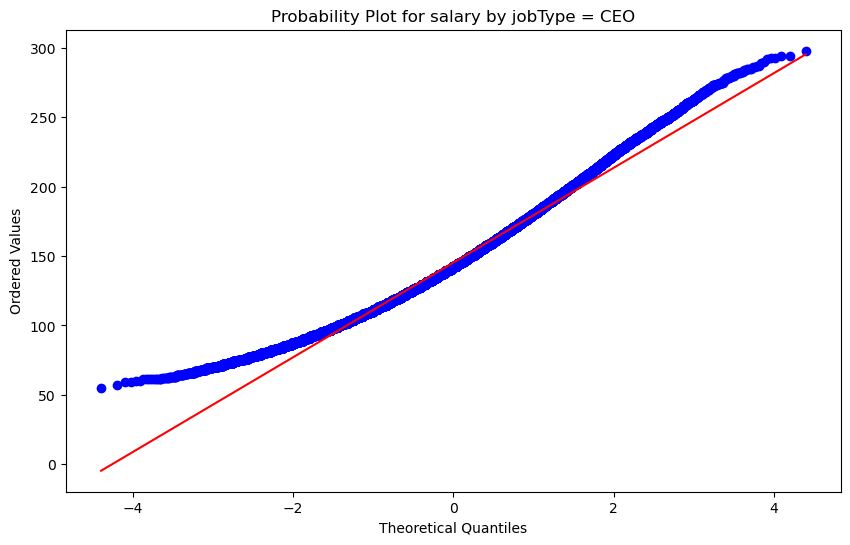

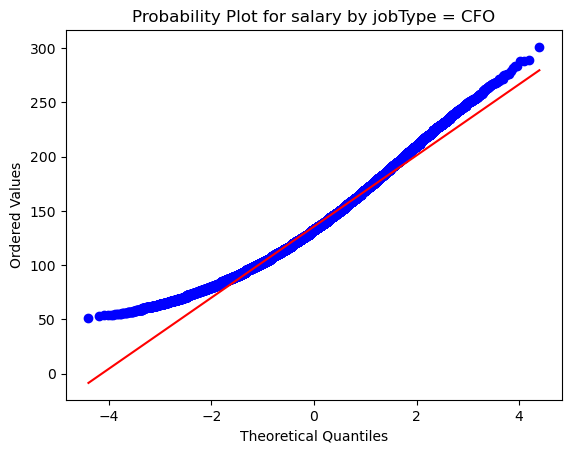

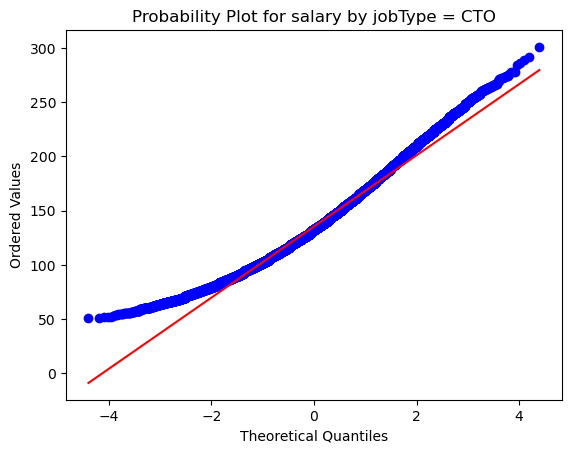

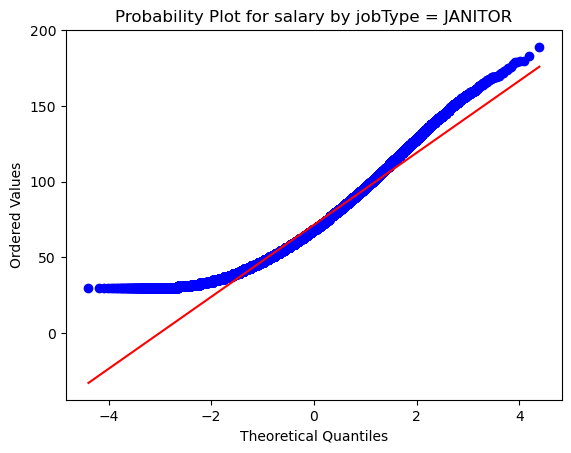

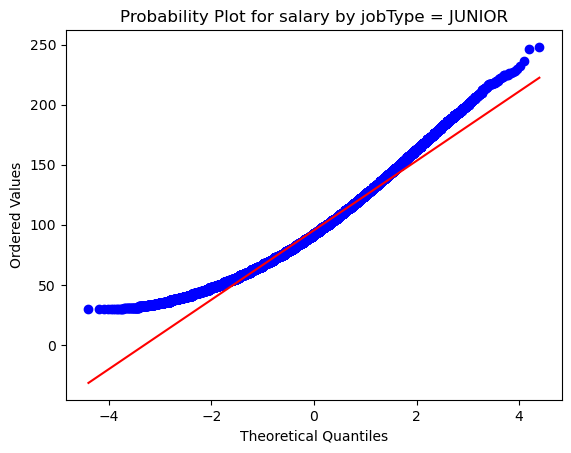

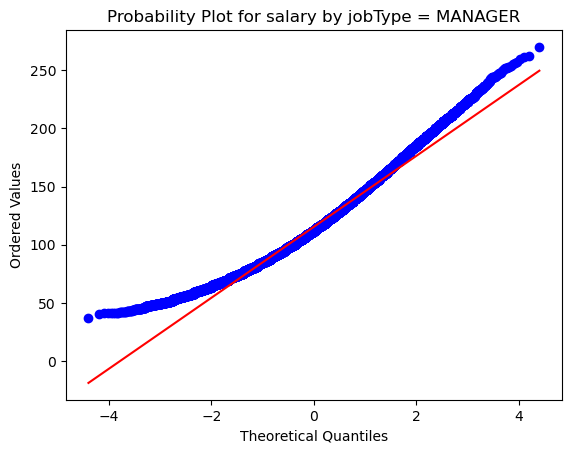

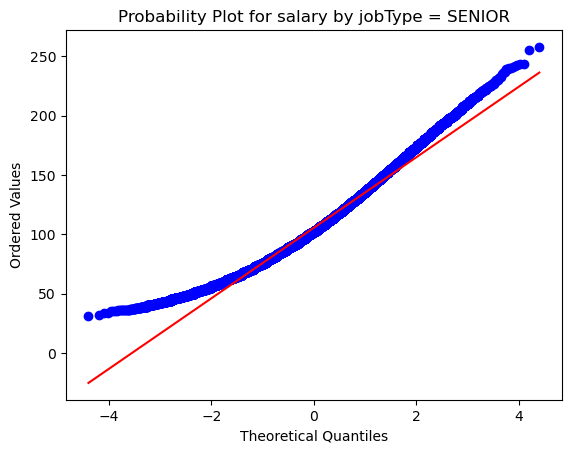

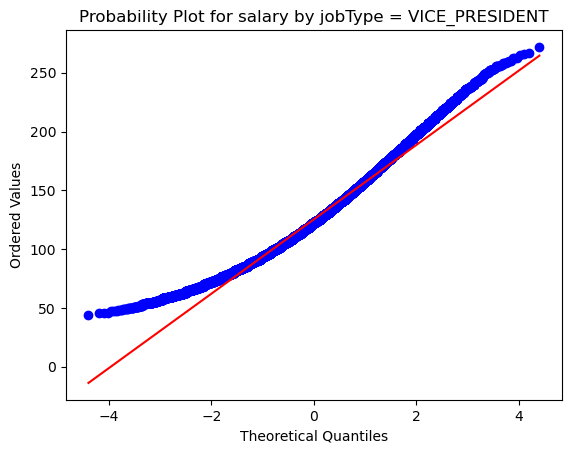

{'Rejection Decision': 'Reject H0', 'Analysis Results': {'F-statistic': 77749.72395597698, 'p-value': 0.0, 'Critical Value': 2.75}}


In [49]:
# performing anova test on jobType and salary
result = perform_anova_with_evaluation(train_data,"jobType","salary")
print(result)

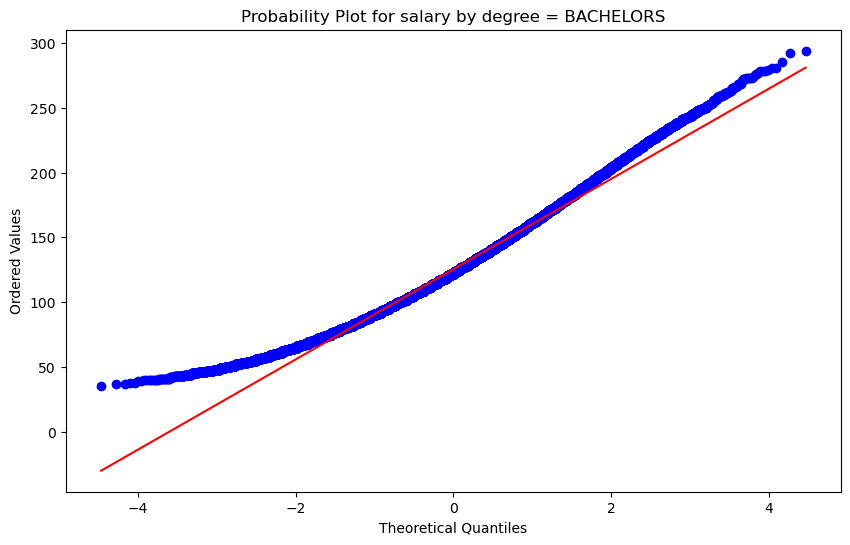

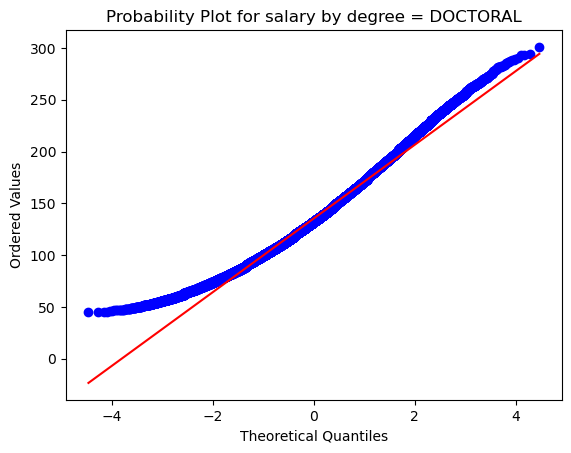

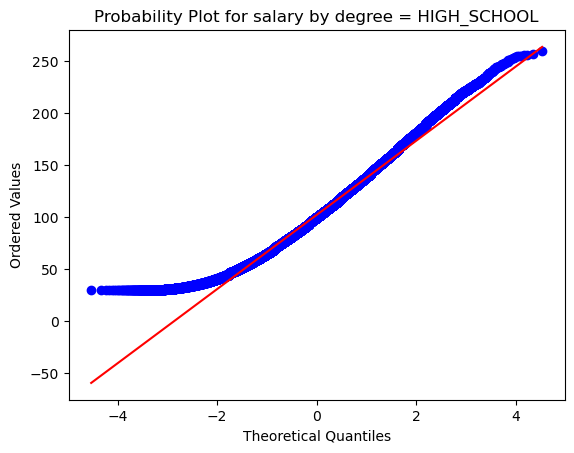

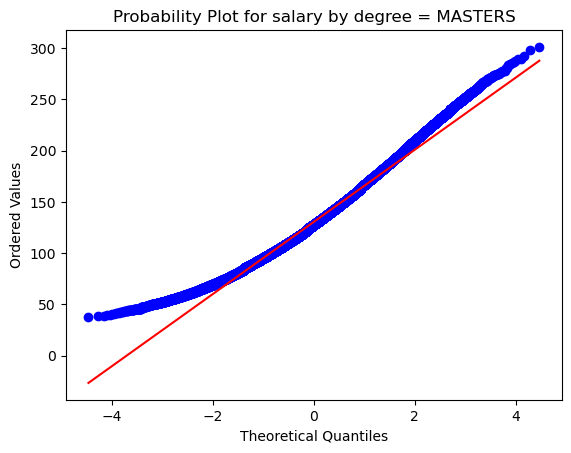

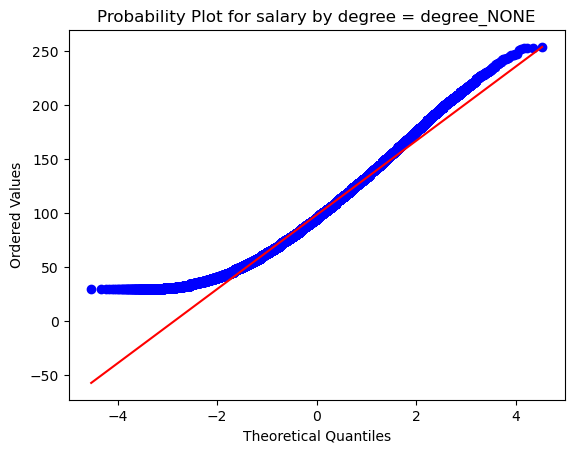

{'Rejection Decision': 'Reject H0', 'Analysis Results': {'F-statistic': 47291.18332925419, 'p-value': 0.0, 'Critical Value': 2.75}}


In [50]:
# performing anova test on degree and salary
result = perform_anova_with_evaluation(train_data,"degree","salary")
print(result)

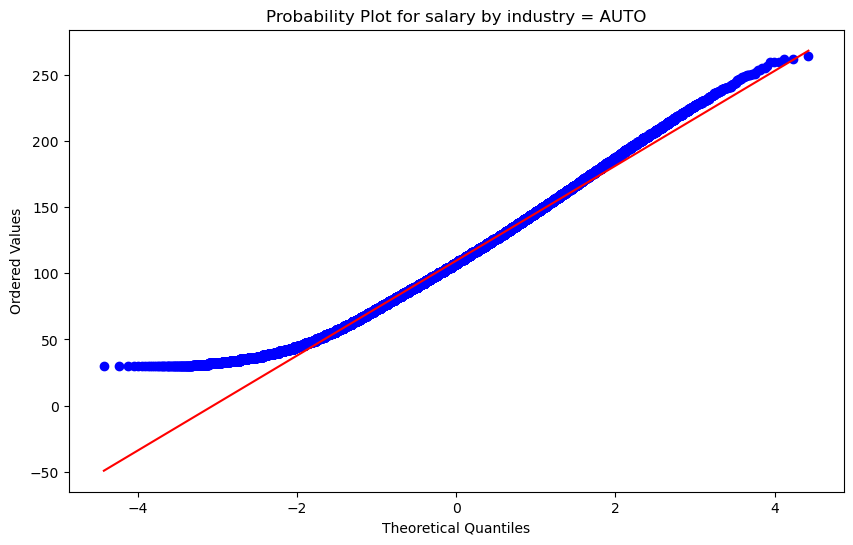

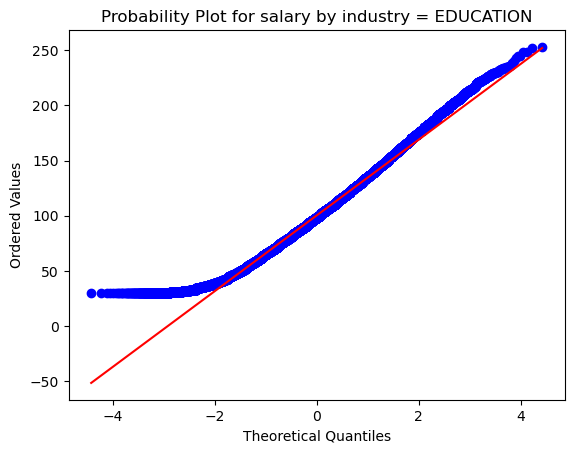

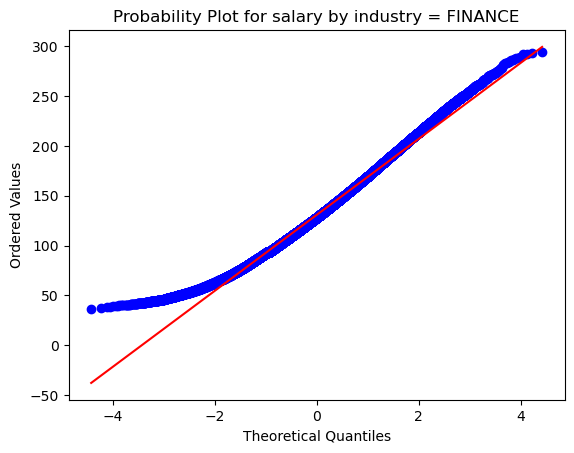

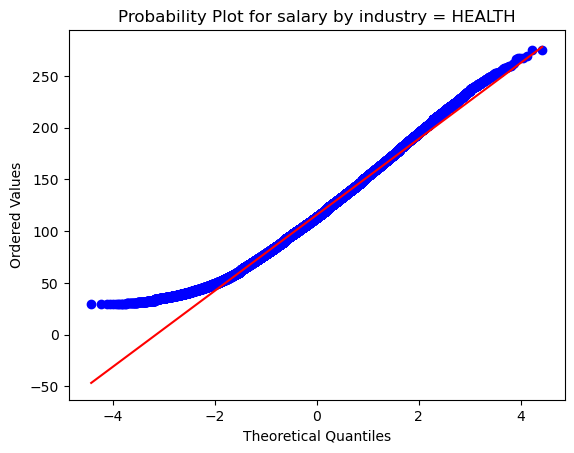

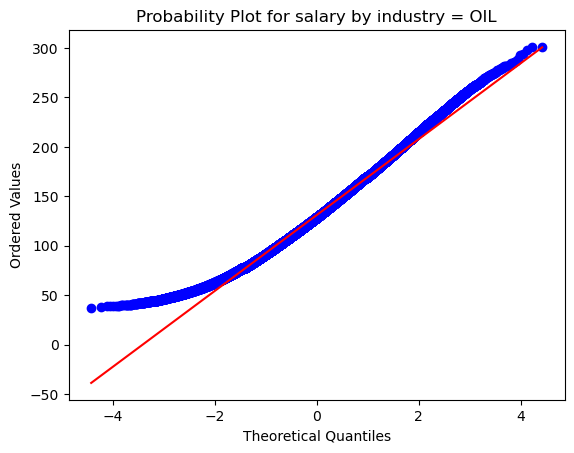

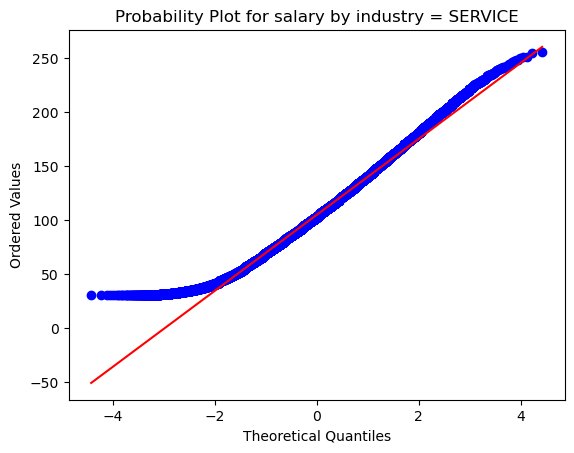

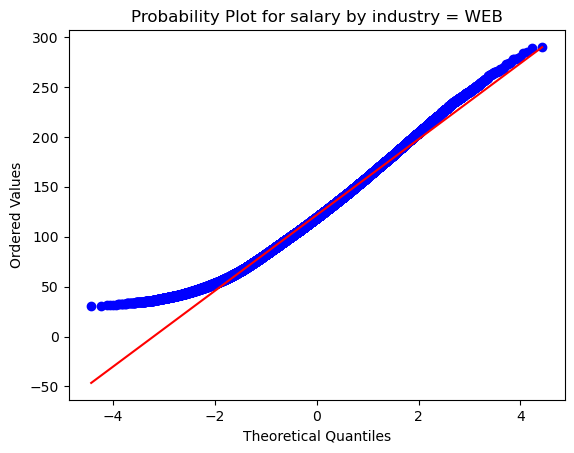

{'Rejection Decision': 'Reject H0', 'Analysis Results': {'F-statistic': 15605.615255233202, 'p-value': 0.0, 'Critical Value': 2.75}}


In [51]:
# performing anova test on industry and salary
result = perform_anova_with_evaluation(train_data,"industry","salary")
print(result)

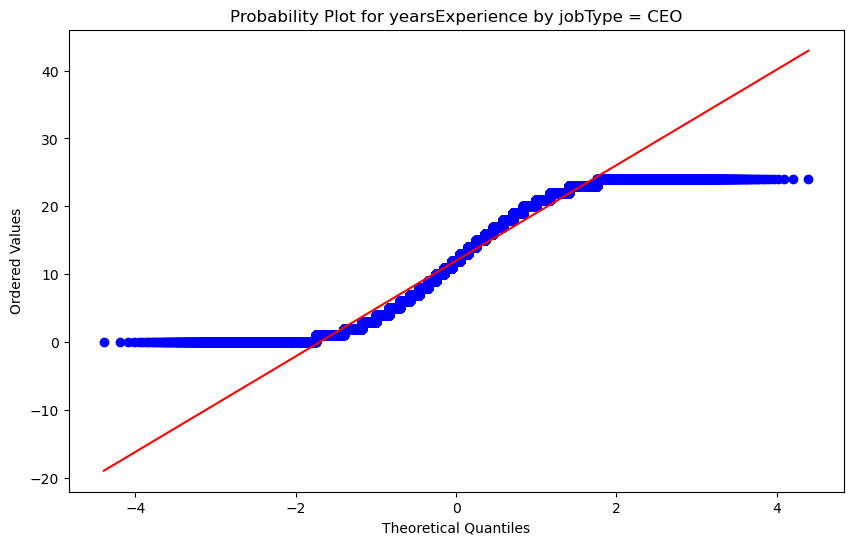

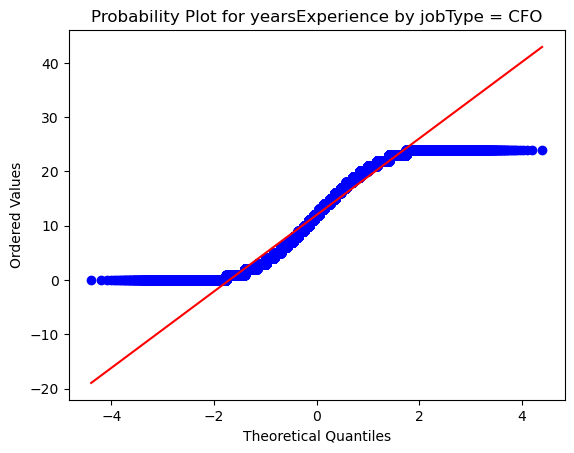

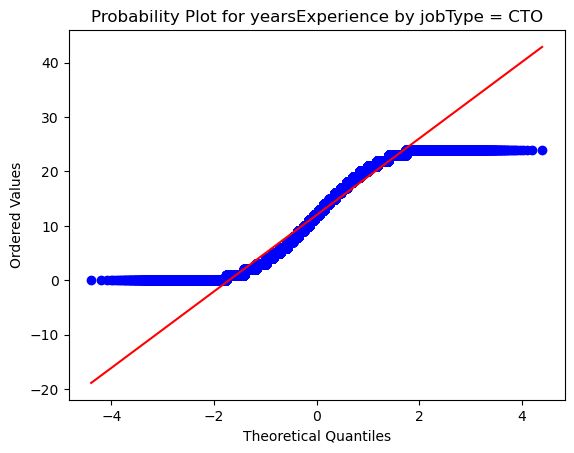

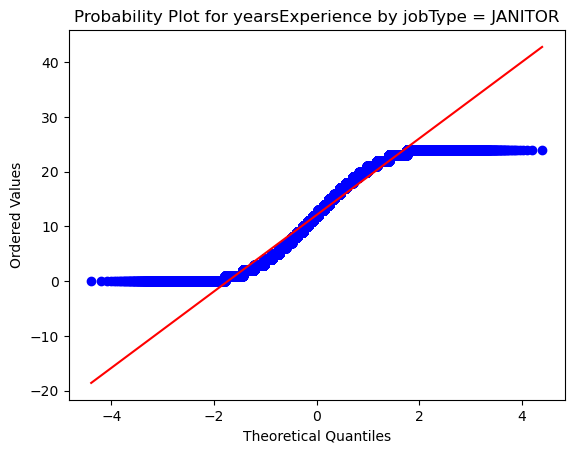

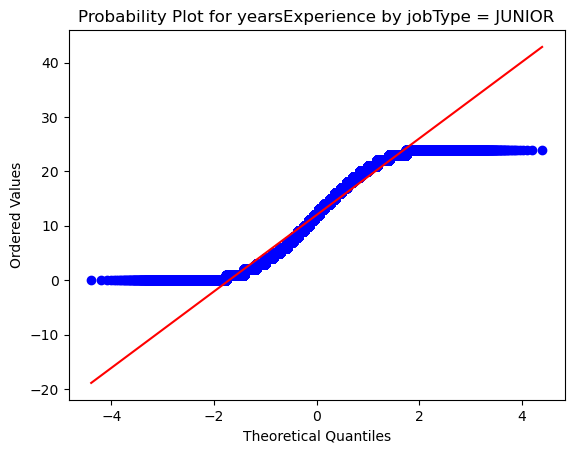

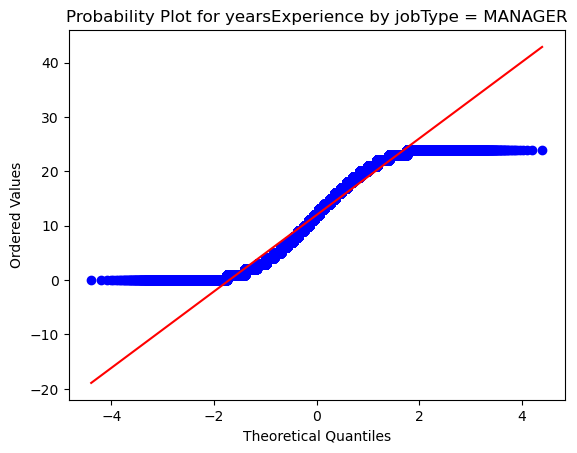

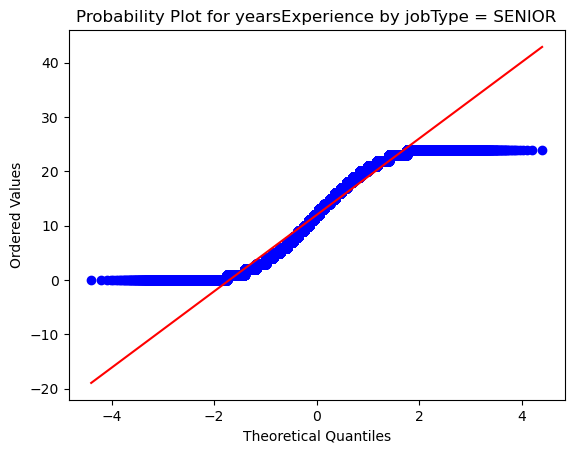

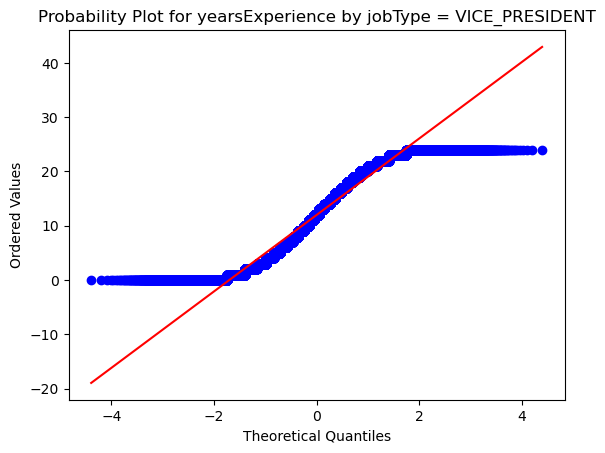

{'Rejection Decision': 'Reject H0', 'Analysis Results': {'F-statistic': 4.35353799858837, 'p-value': 7.769849452815394e-05, 'Critical Value': 2.75}}


In [52]:
# performing anova test on jobType and yearsExperience
result = perform_anova_with_evaluation(train_data,"jobType","yearsExperience")
print(result)

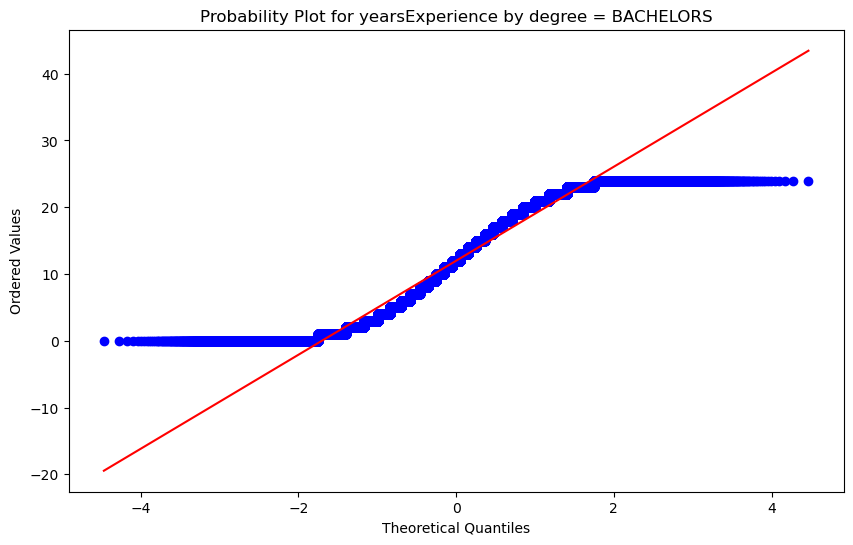

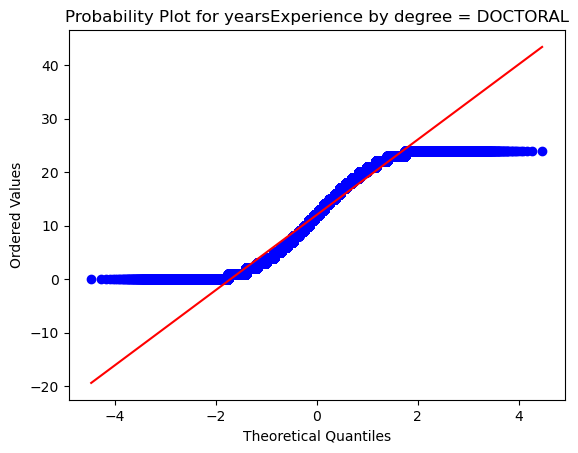

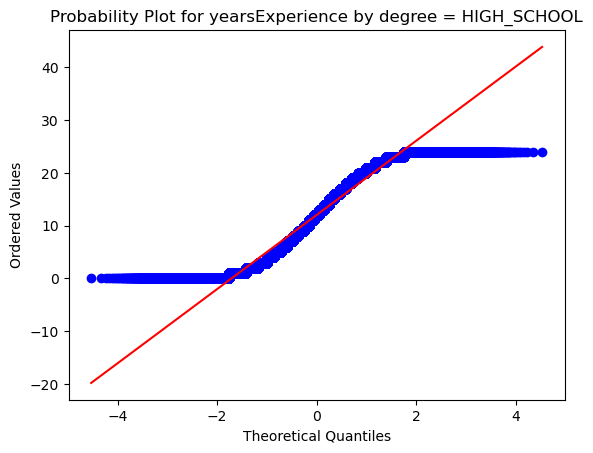

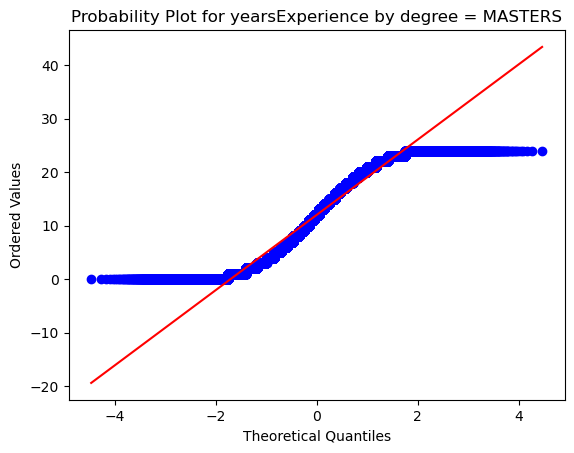

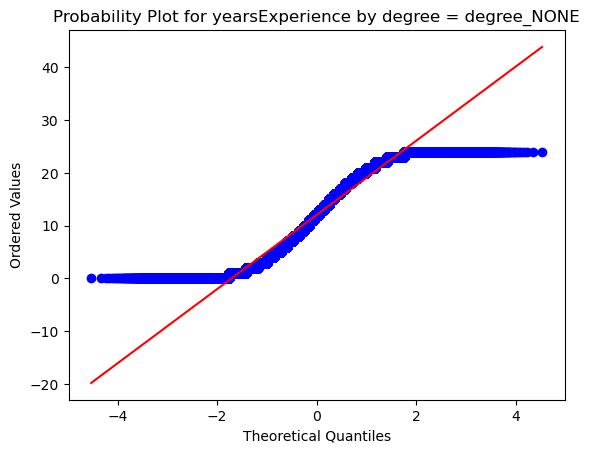

{'Rejection Decision': 'Retain H0', 'Analysis Results': {'F-statistic': 2.1686830810246116, 'p-value': 0.06976505267967559, 'Critical Value': 2.75}}


In [53]:
# performing anova test on degree and yearsExperience
result = perform_anova_with_evaluation(train_data,"degree","yearsExperience")
print(result)

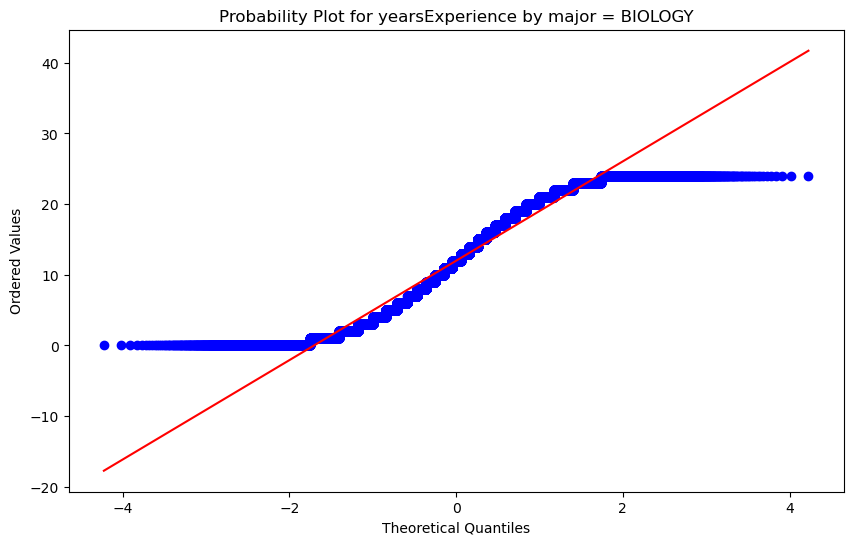

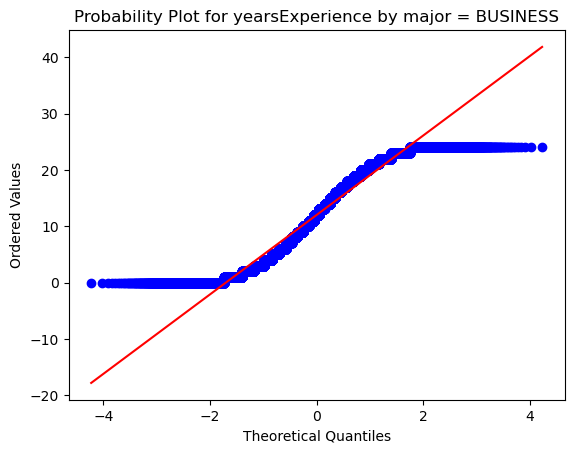

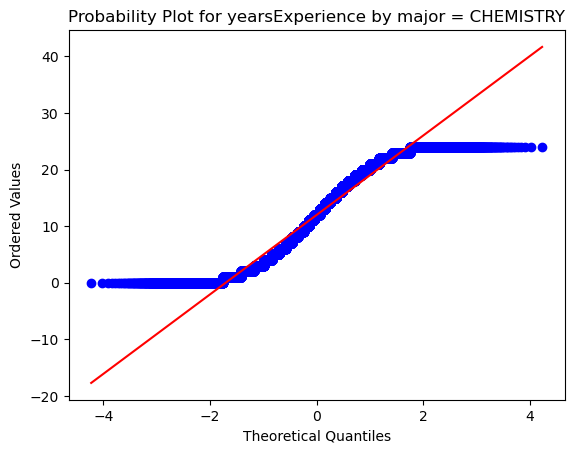

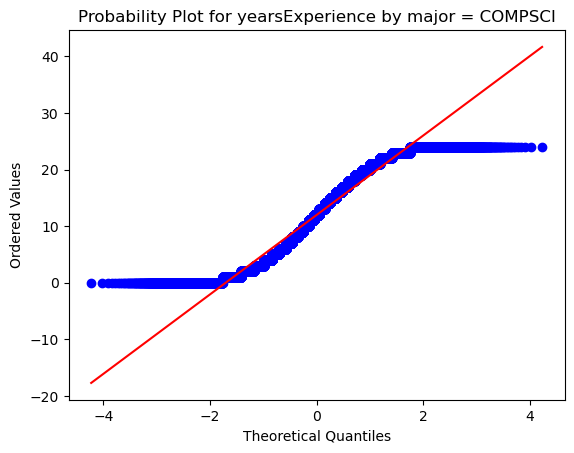

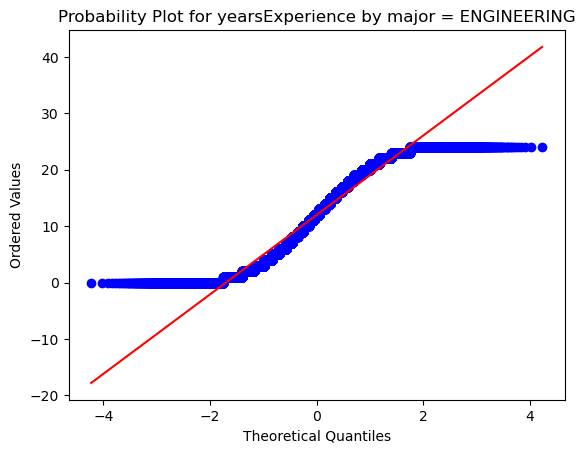

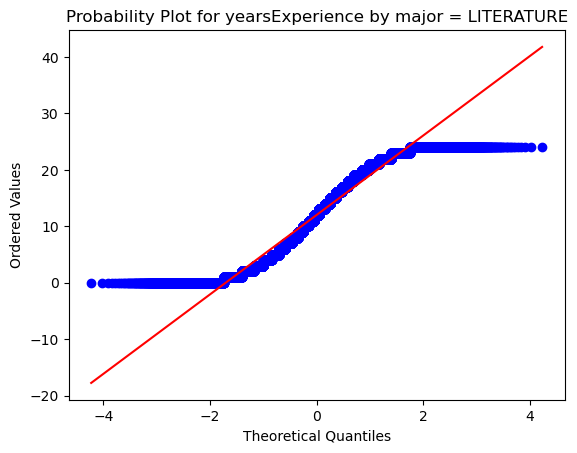

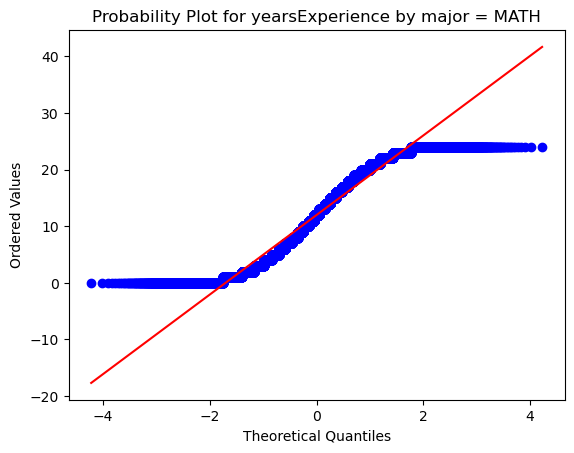

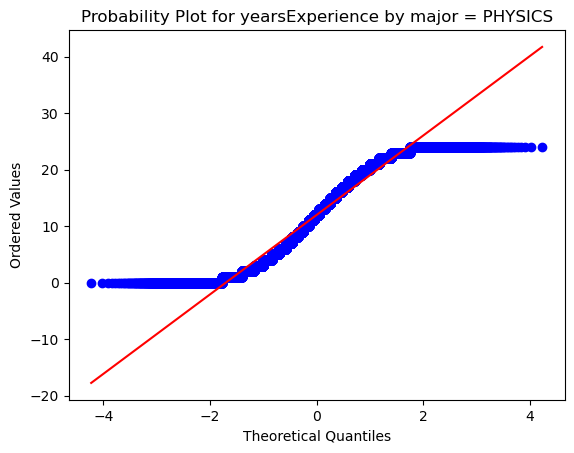

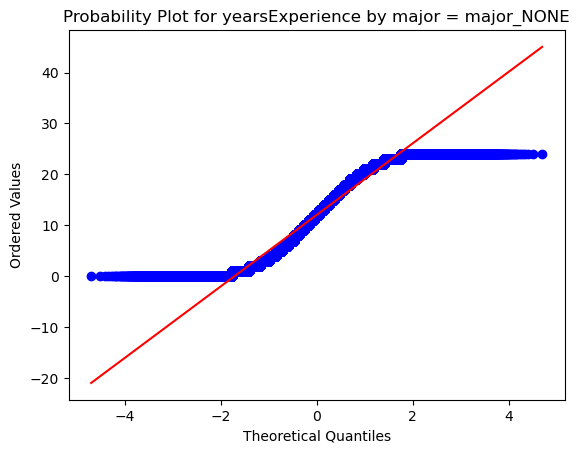

{'Rejection Decision': 'Retain H0', 'Analysis Results': {'F-statistic': 0.9520514717919497, 'p-value': 0.4718080989844571, 'Critical Value': 2.75}}


In [54]:
# performing anova test on major and yearsExperience
result = perform_anova_with_evaluation(train_data,"major","yearsExperience")
print(result)

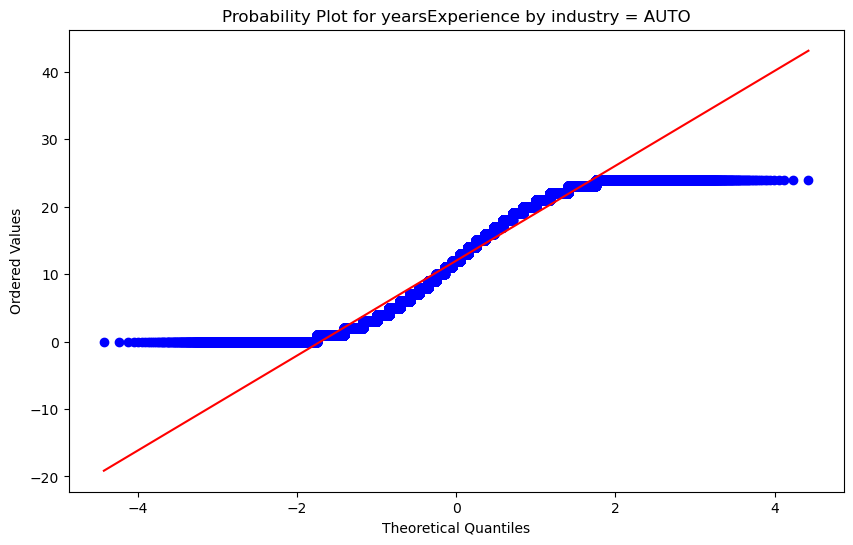

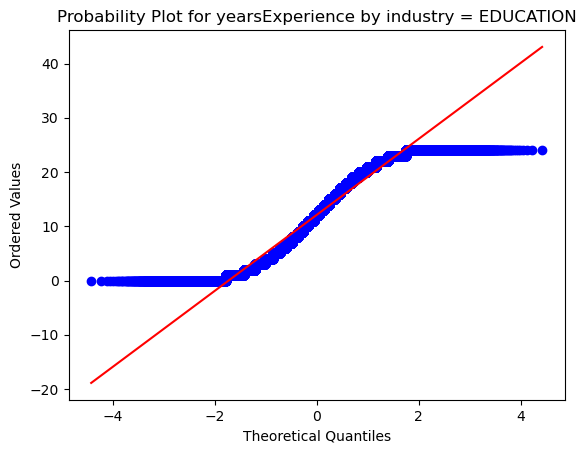

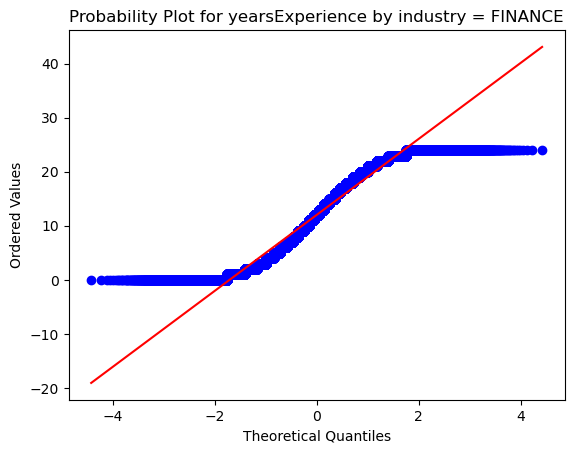

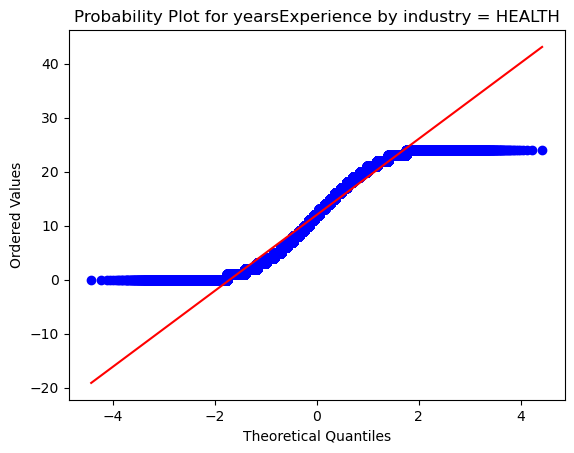

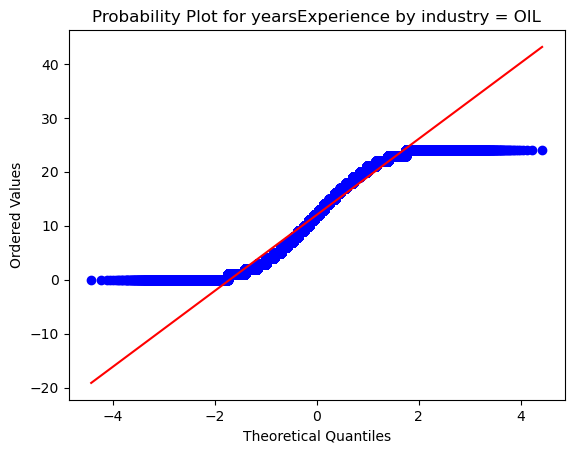

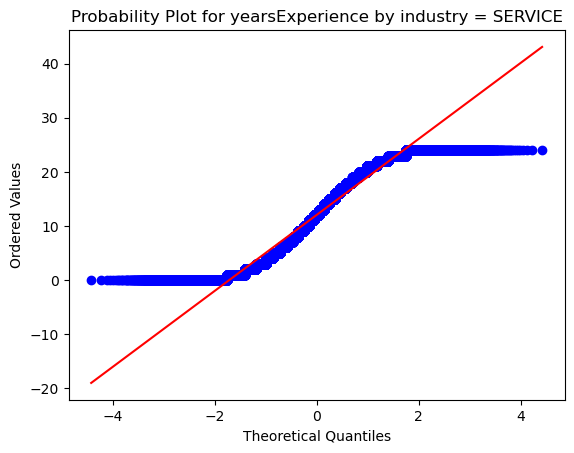

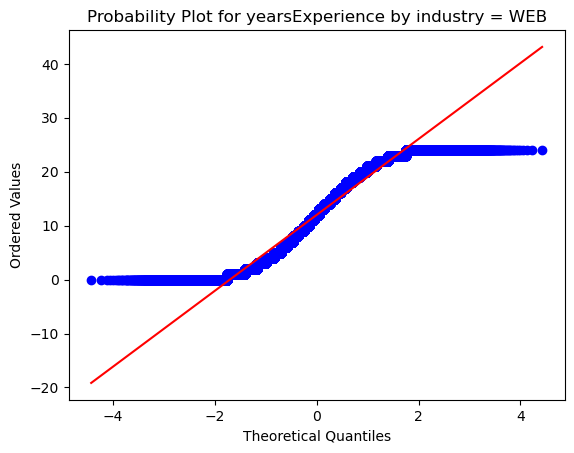

{'Rejection Decision': 'Reject H0', 'Analysis Results': {'F-statistic': 4.177609667340956, 'p-value': 0.0003320646713010755, 'Critical Value': 2.75}}


In [55]:
# performing anova test on industry and yearsExperience
result = perform_anova_with_evaluation(train_data,"industry","yearsExperience")
print(result)

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

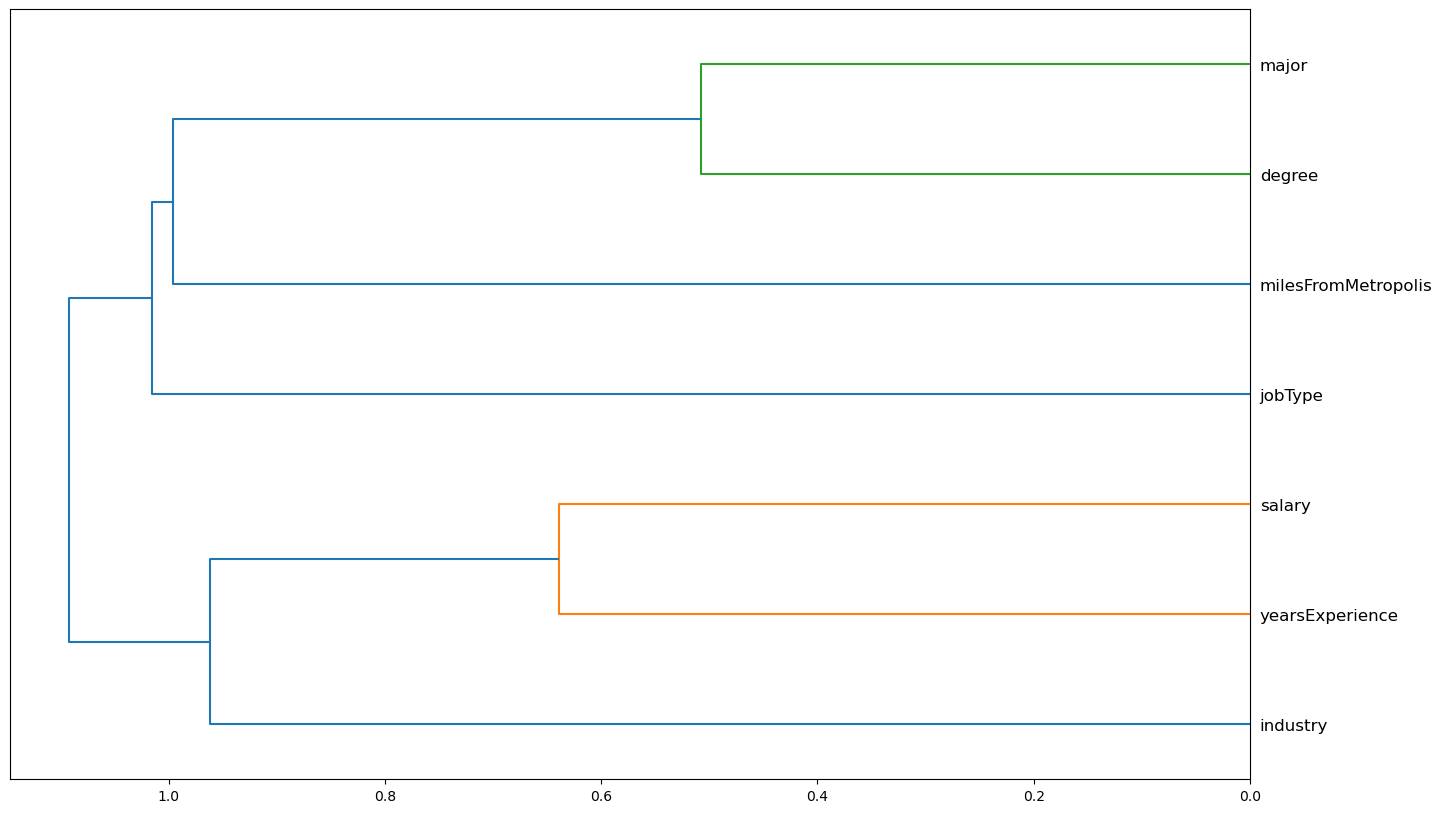

In [56]:
import scipy.stats
from scipy.cluster import hierarchy as hc

# Assuming train_data is your DataFrame containing the dataset
X = train_data.iloc[0:50000]  # Selecting the first 50000 rows

# Calculate correlations and distances
corr_matrix = np.round(scipy.stats.spearmanr(X).correlation, 4)
dissimilarity_matrix = 1 - corr_matrix
distance = hc.distance.squareform(dissimilarity_matrix)

# Perform hierarchical clustering and plot dendrogram
plt.figure(figsize=(16, 10))
linkage_matrix = hc.linkage(distance, method='average')
dendrogram = hc.dendrogram(linkage_matrix, labels=X.columns, orientation="left", leaf_font_size=12)
plt.show()

## Observation from dendrogram
Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Scaling

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [57]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_data[col_train] = sc.fit_transform(train_data[col_train])
test_data[col_train] = sc.fit_transform(test_data[col_train])

In [58]:
train_data

jobType       degree       major   industry  yearsExperience  \
0                  CFO      MASTERS        MATH     HEALTH        -0.279021   
1                  CEO  HIGH_SCHOOL  major_NONE        WEB        -1.250398   
2       VICE_PRESIDENT     DOCTORAL     PHYSICS     HEALTH        -0.279021   
3              MANAGER     DOCTORAL   CHEMISTRY       AUTO        -0.556557   
4       VICE_PRESIDENT    BACHELORS     PHYSICS    FINANCE        -0.556557   
...                ...          ...         ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS   CHEMISTRY     HEALTH         0.969894   
999996             CTO  HIGH_SCHOOL  major_NONE    FINANCE        -0.001484   
999997          JUNIOR  HIGH_SCHOOL  major_NONE  EDUCATION         0.553589   
999998             CFO      MASTERS  major_NONE     HEALTH        -0.834093   
999999          JUNIOR    BACHELORS  major_NONE  EDUCATION         1.108662   

        milesFromMetropolis  salary  
0                  1.161525     130  
1                  0.815090     101  
2                 -0.397433     137  
3                 -1.124947     142  
4                 -1.159590     163  
...                     ...     ...  
999995             1.542604      88  
999996            -0.501363     160  
999997             1.092238      64  
999998            -1.540669     149  
999999            -1.332808      88  

[998066 rows x 7 columns]

In [59]:
test_data

jobType       degree       major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL  major_NONE   HEALTH         1.386060   
1               JUNIOR  degree_NONE  major_NONE     AUTO         1.108790   
2                  CTO      MASTERS     BIOLOGY   HEALTH         0.692884   
3              MANAGER  HIGH_SCHOOL  major_NONE      OIL         0.276979   
4               JUNIOR     DOCTORAL     BIOLOGY      OIL        -0.277562   
...                ...          ...         ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS        MATH      OIL         0.276979   
999996         MANAGER  degree_NONE  major_NONE   HEALTH         1.108790   
999997         JANITOR  degree_NONE  major_NONE      OIL        -1.525279   
999998             CTO     DOCTORAL        MATH      OIL         0.276979   
999999          JUNIOR  degree_NONE  major_NONE      OIL         0.554249   

        milesFromMetropolis  
0                  0.812524  
1                 -0.087450  
2                 -1.402798  
3                  1.608656  
4                 -0.191294  
...                     ...  
999995            -1.610485  
999996             0.604838  
999997             1.435584  
999998             0.466380  
999999            -0.641281  

[1000000 rows x 6 columns]

### One-hot-encoding and LabelEncoder
A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [60]:
cate = train_data.select_dtypes(include='object')
cate

jobType       degree       major   industry
0                  CFO      MASTERS        MATH     HEALTH
1                  CEO  HIGH_SCHOOL  major_NONE        WEB
2       VICE_PRESIDENT     DOCTORAL     PHYSICS     HEALTH
3              MANAGER     DOCTORAL   CHEMISTRY       AUTO
4       VICE_PRESIDENT    BACHELORS     PHYSICS    FINANCE
...                ...          ...         ...        ...
999995  VICE_PRESIDENT    BACHELORS   CHEMISTRY     HEALTH
999996             CTO  HIGH_SCHOOL  major_NONE    FINANCE
999997          JUNIOR  HIGH_SCHOOL  major_NONE  EDUCATION
999998             CFO      MASTERS  major_NONE     HEALTH
999999          JUNIOR    BACHELORS  major_NONE  EDUCATION

[998066 rows x 4 columns]

In [61]:
# Encode categorical features
from sklearn.preprocessing import OneHotEncoder as one
from sklearn.preprocessing import LabelEncoder as le

In [62]:
job = pd.get_dummies(train_data['jobType'],drop_first=True)
degree = pd.get_dummies(train_data['degree'],drop_first=True)
major = pd.get_dummies(train_data['major'],drop_first=True)
industry = pd.get_dummies(train_data['industry'],drop_first=True)

In [63]:
train_data = pd.concat([train_data,job,degree,major,industry],axis=1)

In [64]:
train_data

jobType       degree       major   industry  yearsExperience  \
0                  CFO      MASTERS        MATH     HEALTH        -0.279021   
1                  CEO  HIGH_SCHOOL  major_NONE        WEB        -1.250398   
2       VICE_PRESIDENT     DOCTORAL     PHYSICS     HEALTH        -0.279021   
3              MANAGER     DOCTORAL   CHEMISTRY       AUTO        -0.556557   
4       VICE_PRESIDENT    BACHELORS     PHYSICS    FINANCE        -0.556557   
...                ...          ...         ...        ...              ...   
999995  VICE_PRESIDENT    BACHELORS   CHEMISTRY     HEALTH         0.969894   
999996             CTO  HIGH_SCHOOL  major_NONE    FINANCE        -0.001484   
999997          JUNIOR  HIGH_SCHOOL  major_NONE  EDUCATION         0.553589   
999998             CFO      MASTERS  major_NONE     HEALTH        -0.834093   
999999          JUNIOR    BACHELORS  major_NONE  EDUCATION         1.108662   

        milesFromMetropolis  salary  CFO  CTO  JANITOR  ...  LITERATURE  MATH  \
0                  1.161525     130    1    0        0  ...           0     1   
1                  0.815090     101    0    0        0  ...           0     0   
2                 -0.397433     137    0    0        0  ...           0     0   
3                 -1.124947     142    0    0        0  ...           0     0   
4                 -1.159590     163    0    0        0  ...           0     0   
...                     ...     ...  ...  ...      ...  ...         ...   ...   
999995             1.542604      88    0    0        0  ...           0     0   
999996            -0.501363     160    0    1        0  ...           0     0   
999997             1.092238      64    0    0        0  ...           0     0   
999998            -1.540669     149    1    0        0  ...           0     0   
999999            -1.332808      88    0    0        0  ...           0     0   

        PHYSICS  major_NONE  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
0             0           0          0        0       1    0        0    0  
1             0           1          0        0       0    0        0    1  
2             1           0          0        0       1    0        0    0  
3             0           0          0        0       0    0        0    0  
4             1           0          0        1       0    0        0    0  
...         ...         ...        ...      ...     ...  ...      ...  ...  
999995        0           0          0        0       1    0        0    0  
999996        0           1          0        1       0    0        0    0  
999997        0           1          1        0       0    0        0    0  
999998        0           1          0        0       1    0        0    0  
999999        0           1          1        0       0    0        0    0  

[998066 rows x 32 columns]

In [65]:
train_data.drop(cate.columns,axis=1,inplace=True)

In [66]:
train_data

yearsExperience  milesFromMetropolis  salary  CFO  CTO  JANITOR  \
0             -0.279021             1.161525     130    1    0        0   
1             -1.250398             0.815090     101    0    0        0   
2             -0.279021            -0.397433     137    0    0        0   
3             -0.556557            -1.124947     142    0    0        0   
4             -0.556557            -1.159590     163    0    0        0   
...                 ...                  ...     ...  ...  ...      ...   
999995         0.969894             1.542604      88    0    0        0   
999996        -0.001484            -0.501363     160    0    1        0   
999997         0.553589             1.092238      64    0    0        0   
999998        -0.834093            -1.540669     149    1    0        0   
999999         1.108662            -1.332808      88    0    0        0   

        JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  ...  LITERATURE  MATH  \
0            0        0       0               0  ...           0     1   
1            0        0       0               0  ...           0     0   
2            0        0       0               1  ...           0     0   
3            0        1       0               0  ...           0     0   
4            0        0       0               1  ...           0     0   
...        ...      ...     ...             ...  ...         ...   ...   
999995       0        0       0               1  ...           0     0   
999996       0        0       0               0  ...           0     0   
999997       1        0       0               0  ...           0     0   
999998       0        0       0               0  ...           0     0   
999999       1        0       0               0  ...           0     0   

        PHYSICS  major_NONE  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
0             0           0          0        0       1    0        0    0  
1             0           1          0        0       0    0        0    1  
2             1           0          0        0       1    0        0    0  
3             0           0          0        0       0    0        0    0  
4             1           0          0        1       0    0        0    0  
...         ...         ...        ...      ...     ...  ...      ...  ...  
999995        0           0          0        0       1    0        0    0  
999996        0           1          0        1       0    0        0    0  
999997        0           1          1        0       0    0        0    0  
999998        0           1          0        0       1    0        0    0  
999999        0           1          1        0       0    0        0    0  

[998066 rows x 28 columns]

In [67]:
# for test data
job = pd.get_dummies(test_data['jobType'],drop_first=True)
degree = pd.get_dummies(test_data['degree'],drop_first=True)
major = pd.get_dummies(test_data['major'],drop_first=True)
industry = pd.get_dummies(test_data['industry'],drop_first=True)

In [68]:
test_data

jobType       degree       major industry  yearsExperience  \
0              MANAGER  HIGH_SCHOOL  major_NONE   HEALTH         1.386060   
1               JUNIOR  degree_NONE  major_NONE     AUTO         1.108790   
2                  CTO      MASTERS     BIOLOGY   HEALTH         0.692884   
3              MANAGER  HIGH_SCHOOL  major_NONE      OIL         0.276979   
4               JUNIOR     DOCTORAL     BIOLOGY      OIL        -0.277562   
...                ...          ...         ...      ...              ...   
999995  VICE_PRESIDENT    BACHELORS        MATH      OIL         0.276979   
999996         MANAGER  degree_NONE  major_NONE   HEALTH         1.108790   
999997         JANITOR  degree_NONE  major_NONE      OIL        -1.525279   
999998             CTO     DOCTORAL        MATH      OIL         0.276979   
999999          JUNIOR  degree_NONE  major_NONE      OIL         0.554249   

        milesFromMetropolis  
0                  0.812524  
1                 -0.087450  
2                 -1.402798  
3                  1.608656  
4                 -0.191294  
...                     ...  
999995            -1.610485  
999996             0.604838  
999997             1.435584  
999998             0.466380  
999999            -0.641281  

[1000000 rows x 6 columns]

In [69]:
test_data = pd.concat([test_data,job,degree,major,industry],axis=1)

In [70]:
test_data.drop(cate.columns,axis=1,inplace=True)

In [71]:
test_data

yearsExperience  milesFromMetropolis  CFO  CTO  JANITOR  JUNIOR  \
0              1.386060             0.812524    0    0        0       0   
1              1.108790            -0.087450    0    0        0       1   
2              0.692884            -1.402798    0    1        0       0   
3              0.276979             1.608656    0    0        0       0   
4             -0.277562            -0.191294    0    0        0       1   
...                 ...                  ...  ...  ...      ...     ...   
999995         0.276979            -1.610485    0    0        0       0   
999996         1.108790             0.604838    0    0        0       0   
999997        -1.525279             1.435584    0    0        1       0   
999998         0.276979             0.466380    0    1        0       0   
999999         0.554249            -0.641281    0    0        0       1   

        MANAGER  SENIOR  VICE_PRESIDENT  DOCTORAL  ...  LITERATURE  MATH  \
0             1       0               0         0  ...           0     0   
1             0       0               0         0  ...           0     0   
2             0       0               0         0  ...           0     0   
3             1       0               0         0  ...           0     0   
4             0       0               0         1  ...           0     0   
...         ...     ...             ...       ...  ...         ...   ...   
999995        0       0               1         0  ...           0     1   
999996        1       0               0         0  ...           0     0   
999997        0       0               0         0  ...           0     0   
999998        0       0               0         1  ...           0     1   
999999        0       0               0         0  ...           0     0   

        PHYSICS  major_NONE  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
0             0           1          0        0       1    0        0    0  
1             0           1          0        0       0    0        0    0  
2             0           0          0        0       1    0        0    0  
3             0           1          0        0       0    1        0    0  
4             0           0          0        0       0    1        0    0  
...         ...         ...        ...      ...     ...  ...      ...  ...  
999995        0           0          0        0       0    1        0    0  
999996        0           1          0        0       1    0        0    0  
999997        0           1          0        0       0    1        0    0  
999998        0           0          0        0       0    1        0    0  
999999        0           1          0        0       0    1        0    0  

[1000000 rows x 27 columns]

In [72]:
train_x = train_data.drop("salary", axis=1)
train_y = train_data["salary"]

In [73]:
print(train_x)

        yearsExperience  milesFromMetropolis  CFO  CTO  JANITOR  JUNIOR  \
0             -0.279021             1.161525    1    0        0       0   
1             -1.250398             0.815090    0    0        0       0   
2             -0.279021            -0.397433    0    0        0       0   
3             -0.556557            -1.124947    0    0        0       0   
4             -0.556557            -1.159590    0    0        0       0   
...                 ...                  ...  ...  ...      ...     ...   
999995         0.969894             1.542604    0    0        0       0   
999996        -0.001484            -0.501363    0    1        0       0   
999997         0.553589             1.092238    0    0        0       1   
999998        -0.834093            -1.540669    1    0        0       0   
999999         1.108662            -1.332808    0    0        0       1   

        MANAGER  SENIOR  VICE_PRESIDENT  DOCTORAL  ...  LITERATURE  MATH  \
0             0       0

In [74]:
print(train_y)

0         130
1         101
2         137
3         142
4         163
         ... 
999995     88
999996    160
999997     64
999998    149
999999     88
Name: salary, Length: 998066, dtype: int64


In [75]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.3)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(train_x,train_y,test_size=0.3,random_state=1)

In [76]:
print(xtrain.columns)
print(xtest.columns)

Index(['yearsExperience', 'milesFromMetropolis', 'CFO', 'CTO', 'JANITOR',
       'JUNIOR', 'MANAGER', 'SENIOR', 'VICE_PRESIDENT', 'DOCTORAL',
       'HIGH_SCHOOL', 'MASTERS', 'degree_NONE', 'BUSINESS', 'CHEMISTRY',
       'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'PHYSICS', 'major_NONE',
       'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB'],
      dtype='object')
Index(['yearsExperience', 'milesFromMetropolis', 'CFO', 'CTO', 'JANITOR',
       'JUNIOR', 'MANAGER', 'SENIOR', 'VICE_PRESIDENT', 'DOCTORAL',
       'HIGH_SCHOOL', 'MASTERS', 'degree_NONE', 'BUSINESS', 'CHEMISTRY',
       'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'PHYSICS', 'major_NONE',
       'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB'],
      dtype='object')


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_evaluation(model, xtrain, ytrain, xtest, ytest):
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)

    train_mae = mean_absolute_error(ytrain, ytrain_pred)
    train_mse = mean_squared_error(ytrain, ytrain_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(ytrain, ytrain_pred)

    test_mae = mean_absolute_error(ytest, ytest_pred)
    test_mse = mean_squared_error(ytest, ytest_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(ytest, ytest_pred)

    print("Training Scores:")
    print(f"MAE: {train_mae}\nMSE: {train_mse}\nRMSE: {train_rmse}\nR2: {train_r2}\n")

    print("Testing Scores:")
    print(f"MAE: {test_mae}\nMSE: {test_mse}\nRMSE: {test_rmse}\nR2: {test_r2}\n")
    
    # Visualize feature importance
    if hasattr(model, 'coef_'):  # Linear Regression
        coefficients = model.coef_
    elif hasattr(model, 'feature_importances_'):  # Random Forest, Gradient Boosting, Decision Tree, XGBoost
        coefficients = model.feature_importances_
    else:
        coefficients = None
    
    if coefficients is not None:
        plot_feature_importance(coefficients, xtrain.columns, title="Feature Importance Plot")


# Function to plot feature importance
def plot_feature_importance(coefficients, feature_names, title="Feature Importance"):
    importance = np.abs(coefficients)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, importance)
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

## Linear Regression

Training Scores:
MAE: 15.874080238274871
MSE: 385.4457016074567
RMSE: 19.632771113815206
R2: 0.7409664099241711

Testing Scores:
MAE: 15.84254530631979
MSE: 384.1079729793689
RMSE: 19.59867273514635
R2: 0.7408908834495498



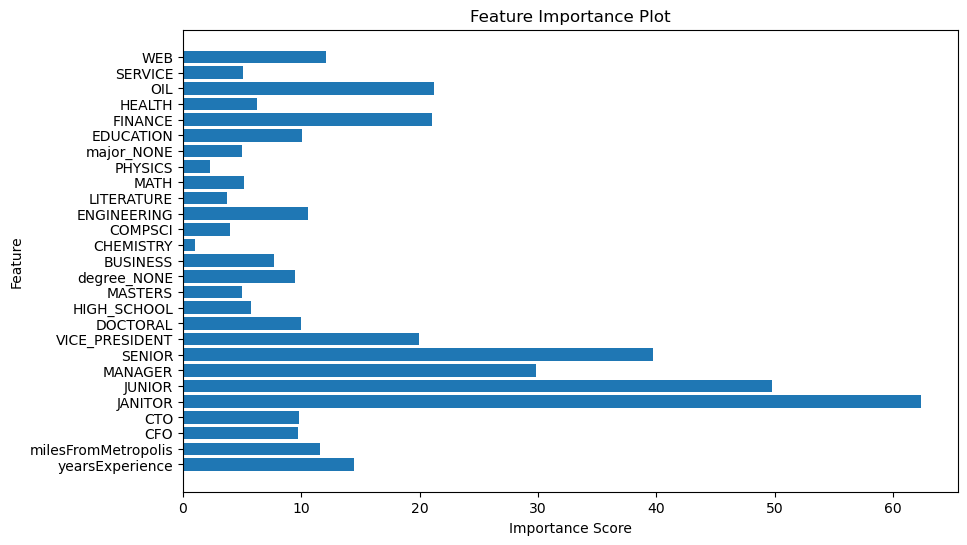

Wall time: 1.12 s


In [78]:
%%time
# Linear Regression model
from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()
lrModel.fit(xtrain, ytrain)

# Evaluate and visualize the Linear Regression model
model_evaluation(lrModel, xtrain, ytrain, xtest, ytest)

## Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

Training Scores:
MAE: 7.919525943627112
MSE: 105.95629430410986
RMSE: 10.293507385925842
R2: 0.9287935001213834

Testing Scores:
MAE: 16.76420579885449
MSE: 444.03226246957337
RMSE: 21.072073046323027
R2: 0.7004675368856026



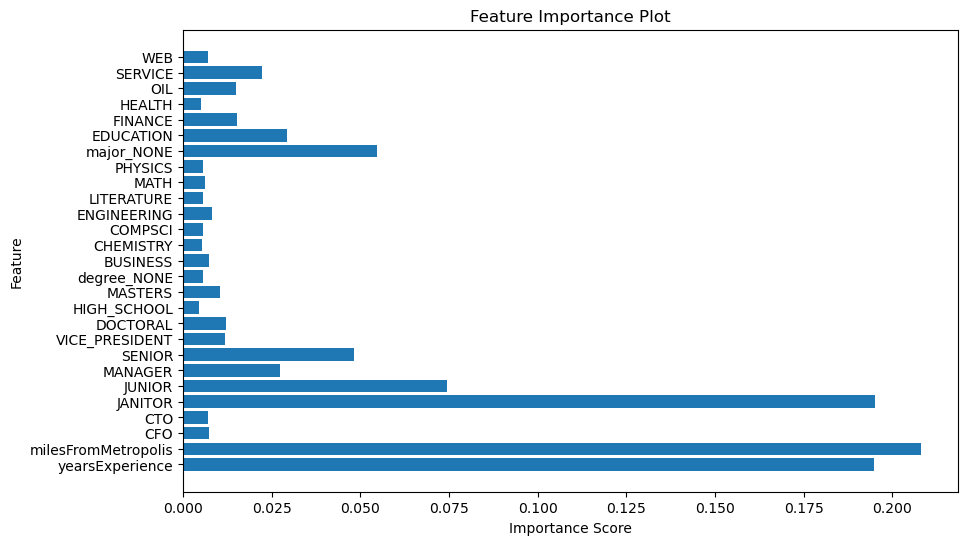

Wall time: 6min 54s


In [79]:
%%time
# Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
rfrModel = RandomForestRegressor()
rfrModel.fit(xtrain, ytrain)

# Evaluate and visualize the Random Forest Regression model
model_evaluation(rfrModel, xtrain, ytrain, xtest, ytest)

## KNeighbors Regressor

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation to select the size that minimises the mean-squared error.

### Note: 
For KNN we used only 10000 samples out of 1000000. You can use complete dataset if you want, it will take longer time to train the model.

In [80]:
%%time
# KNeighbors Regression model
from sklearn.neighbors import KNeighborsRegressor
knnrModel = KNeighborsRegressor()
knnrModel.fit(xtrain.iloc[1:10000], ytrain.iloc[1:10000])

# Evaluate and visualize the KNeighbors Regression model
model_evaluation(knnrModel, xtrain, ytrain, xtest, ytest)

Training Scores:
MAE: 17.596280519748195
MSE: 496.6026417384482
RMSE: 22.284583050585628
R2: 0.6662648860937191

Testing Scores:
MAE: 17.607805757798406
MSE: 496.6726660877696
RMSE: 22.28615413407548
R2: 0.6649577077857974

Wall time: 3min 34s


## Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

Training Scores:
MAE: 15.987633314230056
MSE: 396.48803454687925
RMSE: 19.912007295772046
R2: 0.7335455588621862

Testing Scores:
MAE: 15.96229077999655
MSE: 395.72576841750487
RMSE: 19.892857221060652
R2: 0.7330538247993745



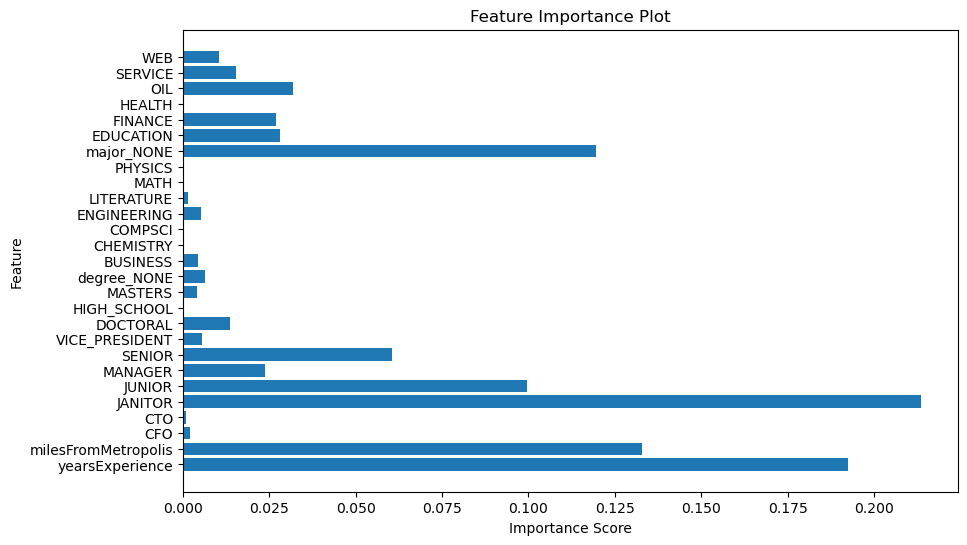

Wall time: 1min 40s


In [81]:
%%time
# Gradient Boosting Regression model
from sklearn.ensemble import GradientBoostingRegressor
gbrModel = GradientBoostingRegressor()
gbrModel.fit(xtrain, ytrain)

# Evaluate and visualize the Gradient Boosting Regression model
model_evaluation(gbrModel, xtrain, ytrain, xtest, ytest)

## DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

Training Scores:
MAE: 3.8773603195005446
MSE: 63.702753535307686
RMSE: 7.981400474560068
R2: 0.9571894228495731

Testing Scores:
MAE: 20.514588716757164
MSE: 699.5375157603911
RMSE: 26.44877153594078
R2: 0.5281104260954583



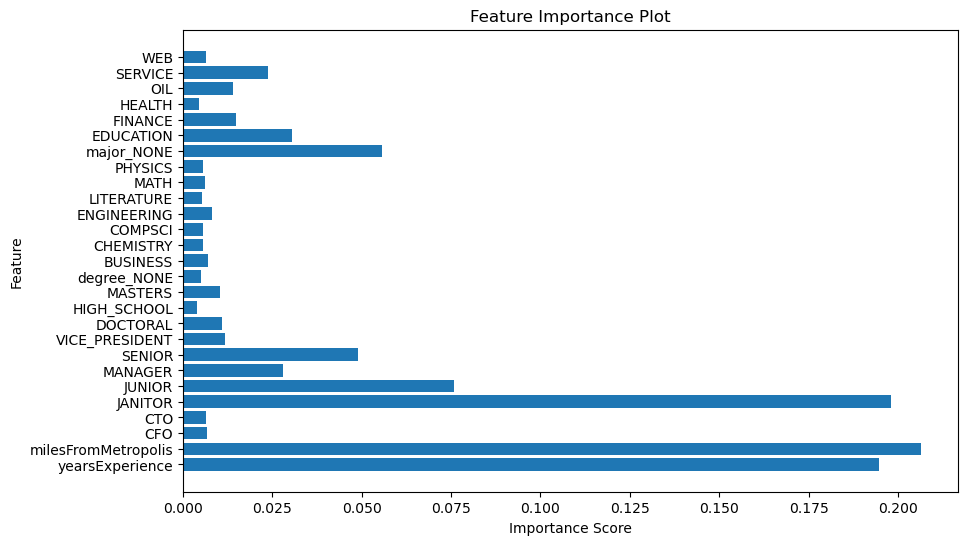

Wall time: 5.94 s


In [82]:
%%time
# DecisionTree Regression model
from sklearn.tree import DecisionTreeRegressor
dtrModel = DecisionTreeRegressor()
dtrModel.fit(xtrain, ytrain)

# Evaluate and visualize the DecisionTree Regression model
model_evaluation(dtrModel, xtrain, ytrain, xtest, ytest)

## AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

Training Scores:
MAE: 23.094358317845373
MSE: 754.5581441474396
RMSE: 27.46922176086246
R2: 0.49290936652208117

Testing Scores:
MAE: 23.032758661195256
MSE: 751.2758721453393
RMSE: 27.409412108714395
R2: 0.4932090942884345



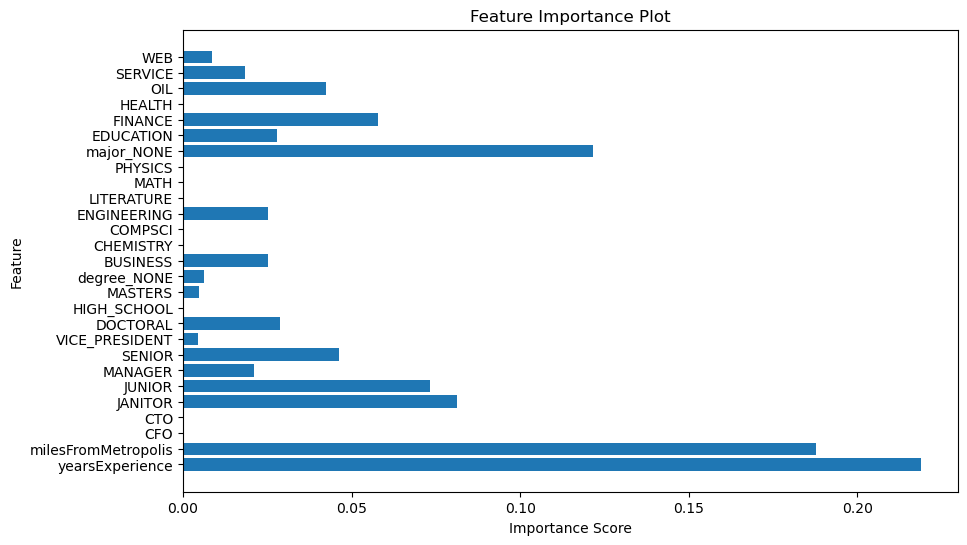

Wall time: 1min 59s


In [83]:
%%time
# AdaBoost Regression model
from sklearn.ensemble import AdaBoostRegressor
adabrModel = AdaBoostRegressor()
adabrModel.fit(xtrain, ytrain)

# Evaluate and visualize the AdaBoost Regression model
model_evaluation(adabrModel, xtrain, ytrain, xtest, ytest)

## XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

Training Scores:
MAE: 15.27432230165554
MSE: 353.68243418380376
RMSE: 18.80644661236683
R2: 0.7623124858019784

Testing Scores:
MAE: 15.39599589388672
MSE: 359.2858883200324
RMSE: 18.95483812434262
R2: 0.757635207648638



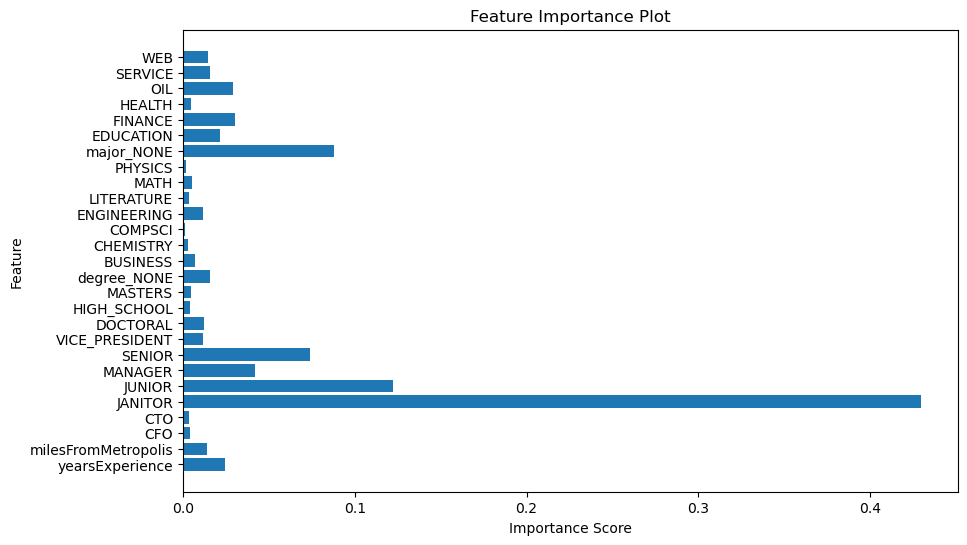

Wall time: 53.4 s


In [84]:
%%time
# XGBoost Regression model
from xgboost import XGBRegressor
xgbrModel = XGBRegressor()
xgbrModel.fit(xtrain, ytrain)

# Evaluate and visualize the AdaBoost Regression model
model_evaluation(xgbrModel, xtrain, ytrain, xtest, ytest)

## Light Gradient Boosted Machine

### Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 698646, number of used features: 27
[LightGBM] [Info] Start training from score 116.213208
Training Scores:
MAE: 15.35742890266176
MSE: 357.34168648277114
RMSE: 18.903483448369276
R2: 0.7598533346010654

Testing Scores:
MAE: 15.365779661059968
MSE: 357.7118744117924
RMSE: 18.913272440585008
R2: 0.7586969959526888



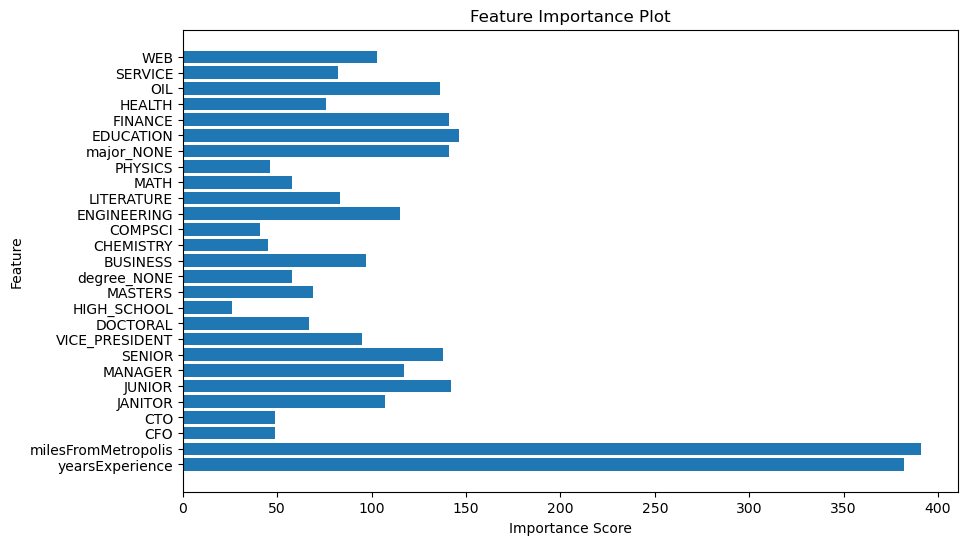

Wall time: 10 s


In [85]:
%%time
# Light Gradient Boosted Machine Regression model
import lightgbm as lgbm
lgbmrModel = lgbm.LGBMRegressor()
lgbmrModel.fit(xtrain, ytrain)

# Call the model_evaluation function
model_evaluation(lgbmrModel, xtrain, ytrain, xtest, ytest)

## Comparing all the model based on metric

In [86]:
def compare_models(models, names, xtrain, ytrain, xtest, ytest):
    metrics_list = ['rmse', 'MedAE', 'MAE', 'R-squared']
    results_train = pd.DataFrame({'Metric': metrics_list})
    results_test = pd.DataFrame({'Metric': metrics_list})

    for model, name in zip(models, names):
        ypred_train = model.predict(xtrain)
        ypred_test = model.predict(xtest)
        
        train_metrics = [
            metrics.mean_squared_error(ytrain, ypred_train, squared=False),
            metrics.median_absolute_error(ytrain, ypred_train),
            metrics.mean_absolute_error(ytrain, ypred_train),
            metrics.r2_score(ytrain, ypred_train)
        ]
        
        test_metrics = [
            metrics.mean_squared_error(ytest, ypred_test, squared=False),
            metrics.median_absolute_error(ytest, ypred_test),
            metrics.mean_absolute_error(ytest, ypred_test),
            metrics.r2_score(ytest, ypred_test)
        ]
        
        results_train[name] = train_metrics
        results_test[name] = test_metrics

    return results_train, results_test

In [87]:
# list of models object
models= [lrModel,rfrModel,knnrModel,gbrModel,dtrModel,adabrModel,xgbrModel,lgbmrModel]

# list of models name
names = ['Linear Regresssor','Random Forest','K-Neighbors','Gradient Boosting','Decision Tree','Ada Boost','XG Boost','Light Gradient Boost']

comp_model_train,comp_model_test = compare_models(models,names,xtrain,ytrain,xtest,ytest)

### RMSE of all model on test and train data

In [88]:
print(comp_model_train[:1])
print("\n")
print(comp_model_test[:1])

  Metric  Linear Regresssor  Random Forest  K-Neighbors  Gradient Boosting  \
0   rmse          19.632771      10.293507    22.284583          19.912007   

   Decision Tree  Ada Boost   XG Boost  Light Gradient Boost  
0         7.9814  27.469222  18.806447             18.903483  


  Metric  Linear Regresssor  Random Forest  K-Neighbors  Gradient Boosting  \
0   rmse          19.598673      21.072073    22.286154          19.892857   

   Decision Tree  Ada Boost   XG Boost  Light Gradient Boost  
0      26.448772  27.409412  18.954838             18.913272  


In [89]:
# printing comparision of model on train:-
print("Results on Train data")
comp_model_train

Results on Train data


Metric  Linear Regresssor  Random Forest  K-Neighbors  \
0       rmse          19.632771      10.293507    22.284583   
1      MedAE          13.762373       6.380000    14.600000   
2        MAE          15.874080       7.919526    17.596281   
3  R-squared           0.740966       0.928794     0.666265   

   Gradient Boosting  Decision Tree  Ada Boost   XG Boost  \
0          19.912007       7.981400  27.469222  18.806447   
1          13.790386       0.000000  21.607070  13.332775   
2          15.987633       3.877360  23.094358  15.274322   
3           0.733546       0.957189   0.492909   0.762312   

   Light Gradient Boost  
0             18.903483  
1             13.401428  
2             15.357429  
3              0.759853

In [90]:
# printing comparision of model on test:-
print("Results on Test data")
comp_model_test

Results on Test data


Metric  Linear Regresssor  Random Forest  K-Neighbors  \
0       rmse          19.598673      21.072073    22.286154   
1      MedAE          13.746675      14.100000    14.600000   
2        MAE          15.842545      16.764206    17.607806   
3  R-squared           0.740891       0.700468     0.664958   

   Gradient Boosting  Decision Tree  Ada Boost   XG Boost  \
0          19.892857      26.448772  27.409412  18.954838   
1          13.778397      16.000000  21.544377  13.436165   
2          15.962291      20.514589  23.032759  15.395996   
3           0.733054       0.528110   0.493209   0.757635   

   Light Gradient Boost  
0             18.913272  
1             13.409585  
2             15.365780  
3              0.758697

## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [91]:
# Import the necessary library for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Helper function to perform hyperparameter tuning with RandomizedSearchCV
def random_Search(model, xtrain, ytrain, param_grid):
    """
    Perform hyperparameter tuning using RandomizedSearchCV.

    Parameters:
        model (estimator): The machine learning model to tune.
        X_train (DataFrame): The training feature dataset.
        Y_train (Series): The training target variable.
        param_grid (dict): The parameter grid to search over.

    Returns:
        None
    """
    # Create a RandomizedSearchCV object
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=20,
        cv=3,
        verbose=2,
        random_state=1,
        n_jobs=-1
    )

    # Fit the RandomizedSearchCV model using a subset of the training data
    random.fit(xtrain, ytrain)

    # Print the best hyperparameters found by RandomizedSearchCV
    print("Best Hyperparameters:", random.best_params_)

In [92]:
# For Random Forest:-
from sklearn.ensemble import RandomForestRegressor

# create parameters dict for tuning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tuning with Randomized Search CV:
random_Search(RandomForestRegressor(), xtrain, ytrain, param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 8.0, 'bootstrap': False}


In [93]:
# For Gradient Boosting:-
from sklearn.ensemble import GradientBoostingRegressor

# create GradientBoostRegressor parameters dict for tuning
gbr_para_grid = {'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
                 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
                 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)}

# passing data for hyper parameter tuning with Randomized Search CV:
random_Search(GradientBoostingRegressor(), xtrain, ytrain, param_grid=gbr_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 0.7000000000000001, 'max_depth': 26.0, 'learning_rate': 0.5}


In [94]:
# For Decision Tree:-
from sklearn.tree import DecisionTreeRegressor

# create DecisionTreeRegressor parameters dict for tuning
dtr_para_grid = {'splitter': ['best', 'random'], 'max_depth': [None, 5, 10, 15], 
                 'min_samples_leaf': [1, 2, 4, 8], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                 'max_features': ['auto', 'sqrt', None] }

# passing data for hyper parameter tuning with Randomized Search CV:
random_Search(DecisionTreeRegressor(), xtrain, ytrain, param_grid=dtr_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}


In [95]:
# For XG Boost:-
from xgboost import XGBRegressor

# create XG Boost parameters dict for tunning
xgbr_para_grid = {'learning_rate':[0.05, 0.1, 0.15], 'max_depth':[3, 5, 7], 
                  'min_child_weight':[1, 3, 5], 'gamma':[0.0, 0.1, 0.2],
                  'colsample_bytree':[0.3, 0.4, 0.5]}

# passing data for hyper parameter tuning with Randomized Search CV:
random_Search(XGBRegressor(), xtrain, ytrain, param_grid=xgbr_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters: {'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.5}


In [96]:
# For Light Gradient Boost:- 
import lightgbm as lgb

# Create a LightGBM regressor
lgb_regressor = lgb.LGBMRegressor()

# create Light Gradient Boost parameters dict for tuning
lgbr_param_grid = {'boosting_type': ['gbdt', 'dart', 'goss'], 'num_leaves': np.arange(20, 200, 10),
              'learning_rate': [0.01, 0.05, 0.1, 0.5], 'n_estimators': np.arange(50, 300, 50),
              'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
              'reg_alpha': [0.0, 0.1, 0.5, 1.0], 'reg_lambda': [0.0, 0.1, 0.5, 1.0],
              'min_child_samples': np.arange(1, 21, 1)}

# passing data for hyper parameter tuning with Randomized Search CV:
random_Search(lgb_regressor, xtrain, ytrain, param_grid=lgbr_param_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 698646, number of used features: 27
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 116.213208
Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'num_leaves': 40, 'n_estimators': 150, 'min_child_samples':

## Using the best parameters and training the models

### Random Forest Regressor

Training Scores:
MAE: 25.350526807428434
MSE: 996.9092353740417
RMSE: 31.573869502708117
R2: 0.3300405812238747

Testing Scores:
MAE: 25.32876642261745
MSE: 994.4987288868073
RMSE: 31.535673908873537
R2: 0.32913736454450804



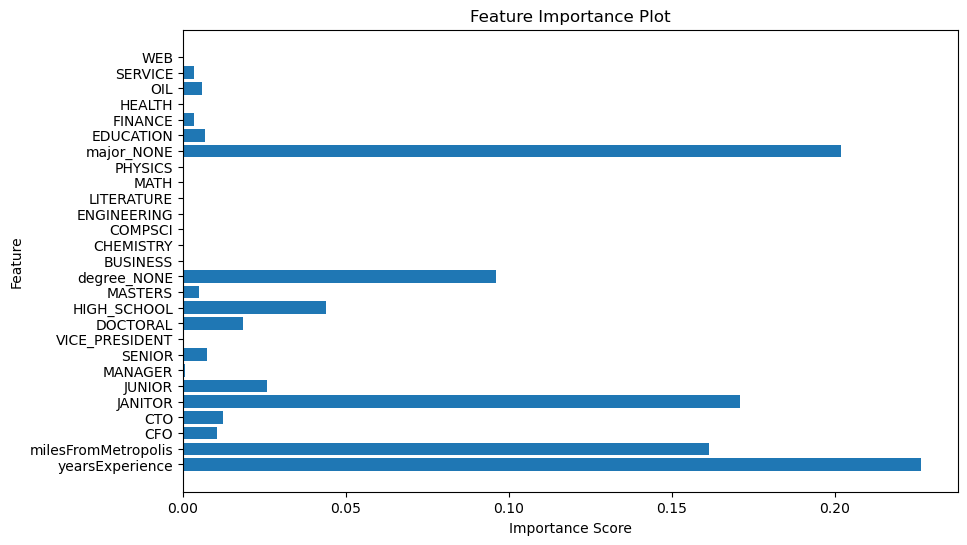

Wall time: 22.3 s


In [97]:
%%time
# Instantiate the model
rf = RandomForestRegressor(**{'n_estimators': 100, 'min_samples_leaf': 0.1,
                              'max_features': 'sqrt', 'max_depth': 8.0, 'bootstrap': False})

# Fit the model to the data
rf.fit(xtrain,ytrain)

# visualizing the inportance of features.
model_evaluation(rf, xtrain, ytrain, xtest, ytest)

### Gradient Boosting Regressor

Training Scores:
MAE: 15.596427514792508
MSE: 370.76513357488864
RMSE: 19.255262490417746
R2: 0.7508322878570929

Testing Scores:
MAE: 15.577362117669963
MSE: 369.74716203767105
RMSE: 19.228810728635068
R2: 0.7505783080744253



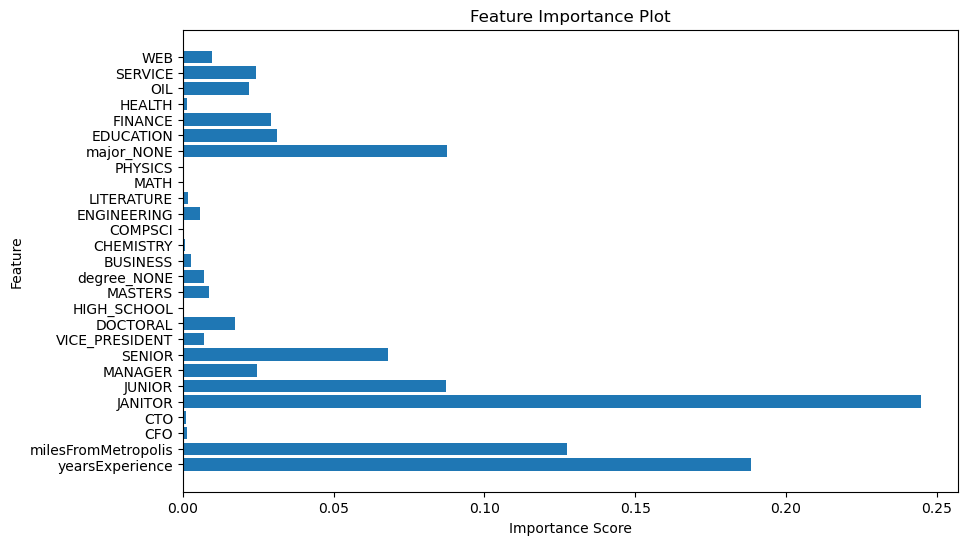

Wall time: 2min 21s


In [98]:
%%time
# Instantiate the model
gbr = GradientBoostingRegressor(**{'n_estimators': 200, 'min_samples_split': 0.7000000000000001,
                                   'max_depth': 26.0, 'learning_rate': 0.5})

# Fit the model to the data
gbr.fit(xtrain,ytrain)

# visualizing the inportance of features.
model_evaluation(gbr, xtrain, ytrain, xtest, ytest)

### Decision Tree Regrsessor

Training Scores:
MAE: 17.370286071207097
MSE: 486.91732694335064
RMSE: 22.06620327431411
R2: 0.6727737713969562

Testing Scores:
MAE: 17.467373154080605
MSE: 490.8206718499759
RMSE: 22.15447295355897
R2: 0.6689053088867372



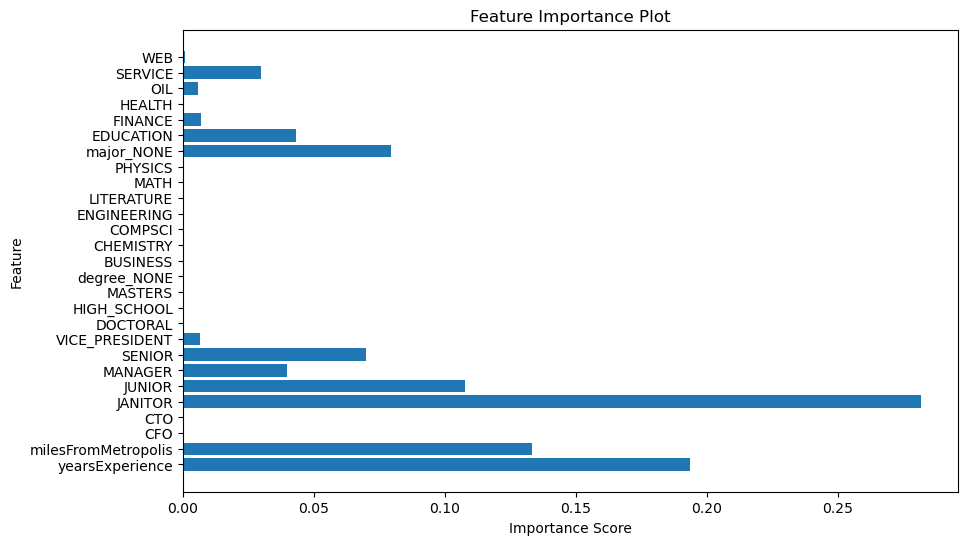

Wall time: 3.3 s


In [99]:
%%time
# Instantiate the model
dtr = DecisionTreeRegressor(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1,
                               'max_features': None, 'max_depth': 10})

# Fit the model to the data
dtr.fit(xtrain,ytrain)

# visualizing the inportance of features.
model_evaluation(dtr, xtrain, ytrain, xtest, ytest)

### XGBoost Regressor

Training Scores:
MAE: 15.321025337495325
MSE: 356.4611625869958
RMSE: 18.880179093085843
R2: 0.7604450788205989

Testing Scores:
MAE: 15.385977861795418
MSE: 359.3725478698537
RMSE: 18.95712393454908
R2: 0.7575767493999828



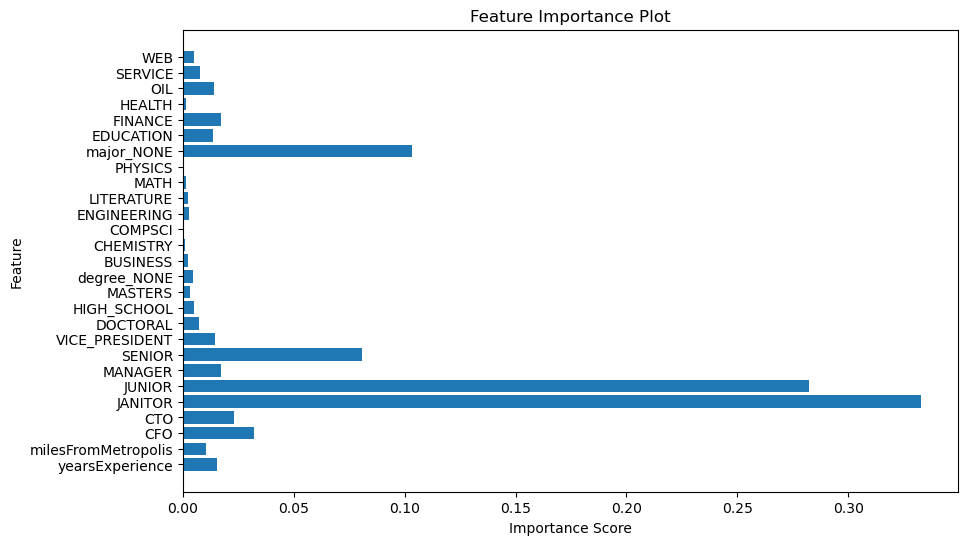

Wall time: 47.8 s


In [100]:
%%time
# Instantiate the model
xgbr = XGBRegressor(**{'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.15,
                       'gamma': 0.2, 'colsample_bytree': 0.5})

xgbr.fit(xtrain,ytrain)

# visualizing the inportance of features.
model_evaluation(xgbr, xtrain, ytrain, xtest, ytest)

### Light Gradient Boost Regressor

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 698646, number of used features: 27
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 116.213208
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_

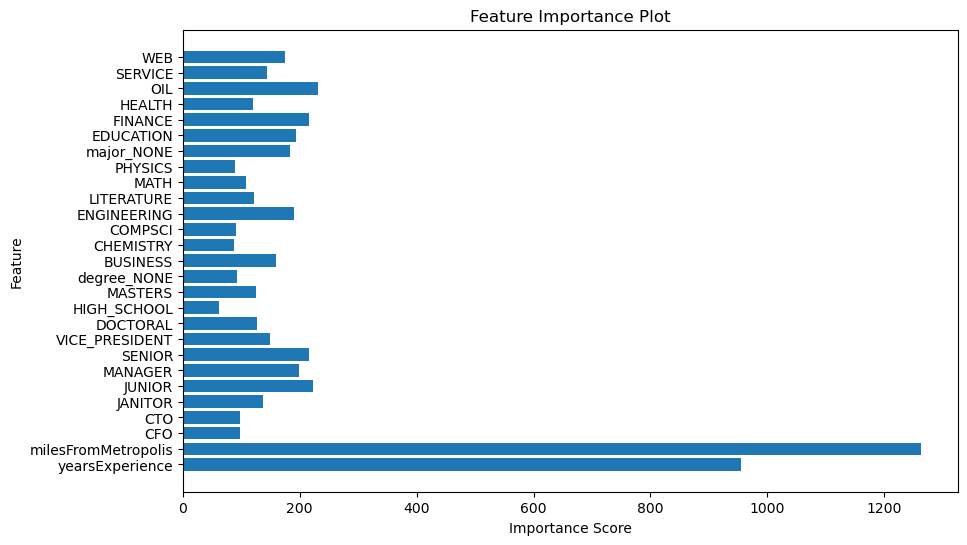

Wall time: 15.5 s


In [101]:
%%time
from lightgbm.sklearn import LGBMRegressor

# Instantiate the model
lgbr = LGBMRegressor(subsample=0.8, reg_lambda=1.0, reg_alpha=0.5,
                     num_leaves=40, n_estimators=150, min_child_samples=1,
                     learning_rate=0.1, colsample_bytree=1.0, boosting_type='goss')

# Fit the model to the data
lgbr.fit(xtrain, ytrain)

# Visualize the importance of features.
model_evaluation(lgbr, xtrain, ytrain, xtest, ytest)

## Comparing the metrics for tuned models

In [102]:
models= [rf, gbr, dtr, xgbr, lgbr]
names = ['Random Forest', 'Gradient Boosting', 'Decision Tree', 'XG Boost', 'Light Gradient Boost']
comp_model_train,comp_model_test = compare_models(models,names,xtrain,ytrain,xtest,ytest)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [103]:
print("Metrics on train data")
comp_model_train

Metrics on train data


Metric  Random Forest  Gradient Boosting  Decision Tree   XG Boost  \
0       rmse      31.573870          19.255262      22.066203  18.880179   
1      MedAE      21.948058          13.555110      14.392909  13.350235   
2        MAE      25.350527          15.596428      17.370286  15.321025   
3  R-squared       0.330041           0.750832       0.672774   0.760445   

   Light Gradient Boost  
0             18.853318  
1             13.368884  
2             15.318930  
3              0.761126

In [104]:
print("Metrics on test data")
comp_model_test

Metrics on test data


Metric  Random Forest  Gradient Boosting  Decision Tree   XG Boost  \
0       rmse      31.535674          19.228811      22.154473  18.957124   
1      MedAE      21.921524          13.545618      14.456190  13.404396   
2        MAE      25.328766          15.577362      17.467373  15.385978   
3  R-squared       0.329137           0.750578       0.668905   0.757577   

   Light Gradient Boost  
0             18.907937  
1             13.424076  
2             15.363660  
3              0.758833

### By the above results the R-squared and rmse values are best for Gradient Boosting.

## Performing the prediction on the test dataset

In [123]:
y_predicted = lgbr.predict(test_data)
y_predicted

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


array([112.38962553,  88.12081985, 179.68771205, ...,  55.71094565,
       160.60966118, 114.43345737])

In [124]:
# creating a dataframe of predicted results:
predictions = pd.DataFrame(y_predicted)
predictions

0
0       112.389626
1        88.120820
2       179.687712
3       105.198516
4       116.537970
...            ...
999995  170.148740
999996  106.032263
999997   55.710946
999998  160.609661
999999  114.433457

[1000000 rows x 1 columns]

**Business Problem:**

In [125]:
# we have to take same samples provided my the manager so that we can explain him 
# the difference between the salary the person should be getting as the salary the person
td_comp = pd.read_csv("train_dataset_complete.csv")
td_comp.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163

In [126]:
sample = td_comp.sample(200)
sample.head()

jobId companyId         jobType       degree      major  \
237972  JOB1362684645659    COMP52  VICE_PRESIDENT     DOCTORAL       NONE   
408819  JOB1362684816506    COMP13  VICE_PRESIDENT  HIGH_SCHOOL       NONE   
688285  JOB1362685095972    COMP12             CFO    BACHELORS  CHEMISTRY   
748362  JOB1362685156049    COMP40             CEO  HIGH_SCHOOL       NONE   
24820   JOB1362684432507    COMP52          JUNIOR         NONE       NONE   

       industry  yearsExperience  milesFromMetropolis  salary  
237972     AUTO               15                   10     129  
408819  SERVICE                6                   92      80  
688285  SERVICE                2                   37     142  
748362     AUTO                6                   76      91  
24820       WEB                2                   82      59

In [127]:
# Renaming the NONE values for degree and major and dropping jobId and companyId from sample dataset respectively:
sample['degree'] = sample['degree'].replace('NONE', 'degree_NONE')
sample['major'] = sample['major'].replace('NONE', 'major_NONE')
sample = sample.drop(["jobId","companyId"],axis=1)

In [128]:
sample

jobType       degree        major industry  yearsExperience  \
237972  VICE_PRESIDENT     DOCTORAL   major_NONE     AUTO               15   
408819  VICE_PRESIDENT  HIGH_SCHOOL   major_NONE  SERVICE                6   
688285             CFO    BACHELORS    CHEMISTRY  SERVICE                2   
748362             CEO  HIGH_SCHOOL   major_NONE     AUTO                6   
24820           JUNIOR  degree_NONE   major_NONE      WEB                2   
...                ...          ...          ...      ...              ...   
915911         MANAGER     DOCTORAL  ENGINEERING      OIL               13   
717139             CFO  degree_NONE   major_NONE     AUTO                9   
569637          JUNIOR    BACHELORS   LITERATURE   HEALTH                1   
21135              CEO     DOCTORAL  ENGINEERING     AUTO                5   
381149  VICE_PRESIDENT  degree_NONE   major_NONE  SERVICE                2   

        milesFromMetropolis  salary  
237972                   10     129  
408819                   92      80  
688285                   37     142  
748362                   76      91  
24820                    82      59  
...                     ...     ...  
915911                   31     158  
717139                   78      81  
569637                   94      74  
21135                    57     105  
381149                   67      61  

[200 rows x 7 columns]

In [129]:
sample_cat = sample.iloc[:,0:4]   #categorical variables for sample
sample_cat.head()

jobType       degree       major industry
237972  VICE_PRESIDENT     DOCTORAL  major_NONE     AUTO
408819  VICE_PRESIDENT  HIGH_SCHOOL  major_NONE  SERVICE
688285             CFO    BACHELORS   CHEMISTRY  SERVICE
748362             CEO  HIGH_SCHOOL  major_NONE     AUTO
24820           JUNIOR  degree_NONE  major_NONE      WEB

In [130]:
job = pd.get_dummies(sample['jobType'],drop_first=True)
degree = pd.get_dummies(sample['degree'],drop_first=True)
major = pd.get_dummies(sample['major'],drop_first=True)
industry = pd.get_dummies(sample['industry'],drop_first=True)

In [131]:
sample = pd.concat([sample,job,degree,major,industry],axis=1)

In [132]:
sample.drop(sample_cat.columns,axis=1,inplace=True)

In [133]:
sample.head()

yearsExperience  milesFromMetropolis  salary  CFO  CTO  JANITOR  \
237972               15                   10     129    0    0        0   
408819                6                   92      80    0    0        0   
688285                2                   37     142    1    0        0   
748362                6                   76      91    0    0        0   
24820                 2                   82      59    0    0        0   

        JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  ...  LITERATURE  MATH  \
237972       0        0       0               1  ...           0     0   
408819       0        0       0               1  ...           0     0   
688285       0        0       0               0  ...           0     0   
748362       0        0       0               0  ...           0     0   
24820        1        0       0               0  ...           0     0   

        PHYSICS  major_NONE  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
237972        0           1          0        0       0    0        0    0  
408819        0           1          0        0       0    0        1    0  
688285        0           0          0        0       0    0        1    0  
748362        0           1          0        0       0    0        0    0  
24820         0           1          0        0       0    0        0    1  

[5 rows x 28 columns]

In [134]:
#taking those samples whose salary is very less i.e the reason for employee resigning
sample = sample[sample["salary"]<60]
sample

yearsExperience  milesFromMetropolis  salary  CFO  CTO  JANITOR  \
24820                 2                   82      59    0    0        0   
719939                0                   33      52    0    0        1   
487417                1                   61      42    0    0        1   
476190                5                   85      53    0    0        0   
545796               14                   36      57    0    0        1   
212893               13                   73      52    0    0        1   
898110                4                   53      41    0    0        1   
574239                1                   71      37    0    0        1   
165729                7                   87      39    0    0        1   
428112                0                   11      45    0    0        1   
579743                5                   14      41    0    0        1   
752192               22                   83      55    0    0        1   
285836                4                   70      39    0    0        1   
147595                7                   93      53    0    0        1   
613836                1                   23      48    0    0        1   

        JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  ...  LITERATURE  MATH  \
24820        1        0       0               0  ...           0     0   
719939       0        0       0               0  ...           0     0   
487417       0        0       0               0  ...           0     0   
476190       0        0       1               0  ...           0     0   
545796       0        0       0               0  ...           0     0   
212893       0        0       0               0  ...           0     0   
898110       0        0       0               0  ...           0     0   
574239       0        0       0               0  ...           0     0   
165729       0        0       0               0  ...           0     0   
428112       0        0       0               0  ...           0     0   
579743       0        0       0               0  ...           0     0   
752192       0        0       0               0  ...           0     0   
285836       0        0       0               0  ...           0     0   
147595       0        0       0               0  ...           0     0   
613836       0        0       0               0  ...           0     0   

        PHYSICS  major_NONE  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
24820         0           1          0        0       0    0        0    1  
719939        0           1          0        1       0    0        0    0  
487417        0           1          0        0       1    0        0    0  
476190        0           1          0        0       0    0        0    1  
545796        0           1          0        0       0    0        1    0  
212893        0           1          0        0       0    0        0    0  
898110        0           1          0        0       0    0        0    0  
574239        0           1          0        0       0    0        1    0  
165729        0           1          0        0       1    0        0    0  
428112        0           1          1        0       0    0        0    0  
579743        0           1          1        0       0    0        0    0  
752192        0           1          0        0       1    0        0    0  
285836        0           1          0        0       0    0        0    0  
147595        0           1          0        0       0    1        0    0  
613836        0           1          1        0       0    0        0    0  

[15 rows x 28 columns]

In [135]:
#Preparing the x and y values
x_sample = sample.drop("salary",axis=1)
y_sample = sample["salary"]

In [136]:
print(x_sample.head())

        yearsExperience  milesFromMetropolis  CFO  CTO  JANITOR  JUNIOR  \
24820                 2                   82    0    0        0       1   
719939                0                   33    0    0        1       0   
487417                1                   61    0    0        1       0   
476190                5                   85    0    0        0       0   
545796               14                   36    0    0        1       0   

        MANAGER  SENIOR  VICE_PRESIDENT  DOCTORAL  ...  LITERATURE  MATH  \
24820         0       0               0         0  ...           0     0   
719939        0       0               0         0  ...           0     0   
487417        0       0               0         0  ...           0     0   
476190        0       1               0         0  ...           0     0   
545796        0       0               0         0  ...           0     0   

        PHYSICS  major_NONE  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
24820         0

In [137]:
print(y_sample.head())

24820     59
719939    52
487417    42
476190    53
545796    57
Name: salary, dtype: int64


In [138]:
# Define the columns to scale
col_test = ['yearsExperience', 'milesFromMetropolis']

# Fit and transform the selected columns
x_sample[col_test] = sc.fit_transform(x_sample[col_test])

# Now, the selected columns in x_sample are scaled
x_sample = x_sample

# Display the scaled data
print(x_sample.head())

        yearsExperience  milesFromMetropolis  CFO  CTO  JANITOR  JUNIOR  \
24820         -0.620539             0.872154    0    0        0       1   
719939        -0.952971            -0.933574    0    0        1       0   
487417        -0.786755             0.098271    0    0        1       0   
476190        -0.121892             0.982709    0    0        0       0   
545796         1.374051            -0.823019    0    0        1       0   

        MANAGER  SENIOR  VICE_PRESIDENT  DOCTORAL  ...  LITERATURE  MATH  \
24820         0       0               0         0  ...           0     0   
719939        0       0               0         0  ...           0     0   
487417        0       0               0         0  ...           0     0   
476190        0       1               0         0  ...           0     0   
545796        0       0               0         0  ...           0     0   

        PHYSICS  major_NONE  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
24820         0

In [139]:
#predicting the sample
predicted_out = lgbr.predict(x_sample)
predicted_out

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


array([72.08506279, 73.20316865, 57.26143443, 87.31886112, 94.10461883,
       72.61813215, 61.70599923, 46.53408398, 60.30694577, 56.32217817,
       70.96681481, 77.5034156 , 55.83047803, 73.563562  , 53.21834021])

In [140]:
y_sample  #Real values

24820     59
719939    52
487417    42
476190    53
545796    57
212893    52
898110    41
574239    37
165729    39
428112    45
579743    41
752192    55
285836    39
147595    53
613836    48
Name: salary, dtype: int64

### As we can see the difference in values.

**Example**: The last sample the real value is 48 but the model predicted it to be 53.218... This may be because the other competitors are offering the employee more as compared to the current salary, so the employee is leaving the company.

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`Insights`**:

**1. Major employee of the company are not happy with the salary they are being provided, even if they have the required skills to do the job as compared to other competitors.**

**2. The employee living in the metro cities are satisfied with the salaries they are receiving, but employee's living far from the city are not getting a satisfactory salary which is the most probable reason for them leaving the company.**

## **`Solution`**:

1. Either increase the salary of these employee's (if they have the required degree and major).

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. Provide appraisal or some token of appreciation to such employee's.

**Note**: Take all the necessary steps to make the employee more loyal to the company

## **`CONCLUSION`**:

1. According to this model, the predicted value we got, matches with the actual target values. Thus, the model is performing well.

2. We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tuning of each model and did prediction.